In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from covid19_vulnerabilidad_mex.datos import *
from covid19_vulnerabilidad_mex.vulnerabilidad import *

from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy.stats import spearmanr, linregress, pearsonr
from ipypublish import nb_setup
from IPython.display import display, HTML, Markdown
import pandas as pd

In [ ]:
sns.set()
sns.set_context("talk")

In [ ]:
modelos, serie_vulnerabilidad = calcular_periodo_vulnerabilidad('20-04-24', '20-07-01')

In [ ]:
serie_vulnerabilidad = agregar_vulnerabilidad_entidades(serie_vulnerabilidad, 'valor')

In [ ]:
checkpoint_vulnerabilidad(serie_vulnerabilidad, 'prueba.feather')

In [ ]:
guardar_shape_vulnerabilidad(serie_vulnerabilidad, 'vulnerabilidad_pls_20-06-01.shp', '20-06-01')

In [ ]:
table = serie_vulnerabilidad.drop(columns='geometry').head()
display(Markdown(table.to_markdown(showindex=False)))

|   CLAVE_MUNICIPIO_RES |   CLAVE_ENTIDAD_RES | MUNICIPIO_RES   | RESULTADO           | ENTIDAD_RES    |   conteo |   defunciones |   pt_2015 |   an_2015 |   ne614_015 |   bi_2015 |   sins_15 |   vpt_2015 |   vns_2015 |   vna_2015 |   vnd_2015 |   vne_2015 |   vnl_2015 |   vnr_2015 |   irs_2015 | grs_2015   |   lmex_2015 |   poblacion |   pobreza |   pobreza_pob |   pobreza_e |   pobreza_e_pob |   pobreza_m |   pobreza_m_pob |   vul_car |   vul_car_pob |   vul_ing |   vul_ing_pob |   npnv |   npnv_pob |   ic_rezedu |   ic_rezedu_pob |   ic_asalud |   ic_asalud_pob |   ic_segsoc |   ic_segsoc_pob |   ic_cv |   ic_cv_pob |   ic_sbv |   ic_sbv_pob |   ic_ali |   ic_ali_pob |   carencias |   carencias_pob |   carencias3 |   carencias3_pob |   plb |   plb_pob |   plbm |   plbm_pob |   pob_total |   mayores_65 |   pob_menore |   sin_derech |   sin_dere_1 |   consultori |   consulto_1 |   farmacias |   porc_carencia_salud |   tasa_diabetes |   tasa_cardiacas |   tasa_cancer |   tasa_pulmonares | grado_diabetes   | grado_cardiacas   | grado_cancer   | grado_pulmonares   |   hospitales_imss |   hospitales_issste |   hospitales_ssa |   hospitales_sme |   hospitales_semar |   hospitales_sedena |   hospitales_pemex |   total_hospitales_publicos |   total_camas_publicos |   hospitales_privados |   total_de_camas_privados |   total_camas |   pob2020 |   CVE_MUN |   covid_confirmados_100k |   covid_defun_100k |   tasa_covid_letal | modelo   | dia_ajuste          |    valor |   poblacion_entidad |   proporcion_pob_entidad |   valor_entidad |   letalidad_entidad |
|----------------------:|--------------------:|:----------------|:--------------------|:---------------|---------:|--------------:|----------:|----------:|------------:|----------:|----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|-----------:|:-----------|------------:|------------:|----------:|--------------:|------------:|----------------:|------------:|----------------:|----------:|--------------:|----------:|--------------:|-------:|-----------:|------------:|----------------:|------------:|----------------:|------------:|----------------:|--------:|------------:|---------:|-------------:|---------:|-------------:|------------:|----------------:|-------------:|-----------------:|------:|----------:|-------:|-----------:|------------:|-------------:|-------------:|-------------:|-------------:|-------------:|-------------:|------------:|----------------------:|----------------:|-----------------:|--------------:|------------------:|:-----------------|:------------------|:---------------|:-------------------|------------------:|--------------------:|-----------------:|-----------------:|-------------------:|--------------------:|-------------------:|----------------------------:|-----------------------:|----------------------:|--------------------------:|--------------:|----------:|----------:|-------------------------:|-------------------:|-------------------:|:---------|:--------------------|---------:|--------------------:|-------------------------:|----------------:|--------------------:|
|                 01001 |                  01 | AGUASCALIENTES  | Positivo SARS-CoV-2 | AGUASCALIENTES |      126 |             2 |    877190 |    2.057  |      3.4786 |   25.6873 |   14.156  |     0.5478 |     0.5543 |     0.6627 |     0.4819 |     0.1999 |    13.8229 |     5.4216 |  -1.36584  | Muy bajo   |        2397 |      861446 |      26.1 |        224949 |         1.6 |           13650 |        24.5 |          211299 |      26.4 |        227805 |      11.5 |         98641 |   36   |     310052 |        11.7 |          100530 |        15.1 |          129728 |        36.4 |          313557 |     3.7 |       32153 |      3   |        25494 |     18   |       154658 |        52.6 |          452753 |          7.3 |            63220 |  37.6 |    323590 |   10   |      86166 |      797010 |        40309 |       169531 |       178471 |       304855 |          575 |           23 |         656 |                  15.1 |        0.537007 |         1.27351  |      0.74905  |          0.599742 | Bajo             | Bajo              | Medio          | Medio              |                 2 |                   1 |                5 |                0 |                  0 |                   0 |                  0 |                           8 |                   1228 |                    17 |                        43 |          1271 |    961977 |       001 |                 13.098   |           0.207905 |             1.5873 | PLS      | 2020-04-24 00:00:00 |  9.42384 |             1434635 |                0.670538  |         10.4189 |             1.06435 |
|                 01002 |                  01 | ASIENTOS        | Positivo SARS-CoV-2 | AGUASCALIENTES |        1 |             0 |     46464 |    4.4207 |      2.5959 |   41.8921 |    5.5355 |     1.6779 |     5.6457 |     1.2979 |     5.9887 |     1.1681 |    23.4356 |    15.222  |  -0.883915 | Bajo       |        1950 |       46624 |      54   |         25169 |         4.4 |            2067 |        49.5 |           23101 |      29   |         13544 |       7.7 |          3577 |    9.3 |       4335 |        19.8 |            9244 |         6   |            2788 |        69   |           32175 |     7.8 |        3633 |     16.2 |         7553 |     24.7 |        11494 |        83   |           38713 |         14.1 |             6594 |  61.7 |     28745 |   24.4 |      11394 |       45492 |         2627 |        11666 |         6264 |        34652 |           10 |            1 |          24 |                   6   |        0.791348 |         0.989185 |      0.637475 |          0.769366 | Medio            | Muy Bajo          | Medio          | Alto               |                 0 |                   0 |                0 |                0 |                  0 |                   0 |                  0 |                           0 |                      0 |                     0 |                         0 |             0 |     50864 |       002 |                  1.96603 |           0        |             0      | PLS      | 2020-04-24 00:00:00 | 14.2372  |             1434635 |                0.0354543 |         10.4189 |             1.06435 |
|                 01003 |                  01 | CALVILLO        | Positivo SARS-CoV-2 | AGUASCALIENTES |        0 |             0 |     56048 |    4.7805 |      4.3906 |   49.1856 |    9.7524 |     1.0577 |     0.7756 |     0.9519 |     0.8673 |     0.5429 |    15.562  |     7.3826 |  -0.979457 | Bajo       |        2077 |       52773 |      56.8 |         29951 |         3.1 |            1650 |        53.6 |           28301 |      27.6 |         14561 |       6.3 |          3348 |    9.3 |       4913 |        23.2 |           12254 |         9.9 |            5212 |        73.6 |           38857 |     5.2 |        2746 |      7.7 |         4082 |     17.3 |         9148 |        84.3 |           44513 |         10.5 |             5528 |  63.1 |     33299 |   26.8 |      14118 |       54136 |         4034 |        12803 |         9263 |        45895 |           26 |            3 |          32 |                   9.9 |        0.9236   |         1.29304  |      0.73888  |          0.664992 | Medio            | Bajo              | Medio          | Alto               |                 0 |                   0 |                1 |                0 |                  0 |                   0 |                  0 |                           1 |                     46 |                     1 |                         0 |            46 |     60760 |       003 |                  0       |           0        |           nan      | PLS      | 2020-04-24 00:00:00 | 13.4014  |             1434635 |                0.0423522 |         10.4189 |             1.06435 |
|                 01004 |                  01 | COSÍO           | Positivo SARS-CoV-2 | AGUASCALIENTES |        0 |             0 |     15577 |    4.3233 |      2.6265 |   33.0597 |    5.1165 |     1.5629 |     2.8986 |     0.5968 |     1.9324 |     0.7389 |    23.0747 |    12.4467 |  -1.06269  | Muy bajo   |        2164 |       15321 |      43.2 |          6620 |         2.8 |             432 |        40.4 |            6187 |      32.7 |          5004 |       8   |          1232 |   16.1 |       2466 |        14.7 |            2251 |         5.5 |             846 |        62.7 |            9608 |     7.9 |        1215 |      7.6 |         1167 |     20.7 |         3175 |        75.9 |           11623 |          9.9 |             1522 |  51.2 |      7852 |   16.6 |       2546 |       15042 |          844 |         3651 |         2092 |        11093 |            2 |            0 |           8 |                   5.5 |        0.797766 |         1.59553  |      0.797766 |          0.664805 | Medio            | Medio             | Alto           | Alto               |                 0 |                   0 |                0 |                0 |                  0 |                   0 |                  0 |                           0 |                      0 |                     0 |                         0 |             0 |     16918 |       004 |                  0       |           0        |           nan      | PLS      | 2020-04-24 00:00:00 | 12.2692  |             1434635 |                0.0117925 |         10.4189 |             1.06435 |
|                 01005 |                  01 | JESÚS MARÍA     | Positivo SARS-CoV-2 | AGUASCALIENTES |        7 |             0 |    120405 |    3.2445 |      4.1297 |   33.7271 |   13.8341 |     0.9201 |     1.0273 |     0.9443 |     0.7264 |     0.422  |    15.5097 |     8.1976 |  -1.18862  | Muy bajo   |        2286 |      125750 |      25   |         31479 |         1.7 |            2095 |        23.4 |           29385 |      38   |         47831 |       6.6 |          8314 |   30.3 |      38126 |        17.3 |           21712 |        15.2 |           19076 |        45   |           56595 |     8.2 |       10303 |      6.3 |         7977 |     18.7 |        23562 |        63.1 |           79310 |         11.3 |            14225 |  31.6 |     39794 |    7.9 |       9984 |       99590 |         3640 |        26403 |        22241 |        47765 |           48 |            8 |          54 |                  15.2 |        0.522141 |         0.953911 |      0.552264 |          0.552264 | Bajo             | Muy Bajo          | Bajo           | Medio              |                 1 |                   0 |                0 |                0 |                  0 |                   0 |                  0 |                           1 |                    297 |                     0 |                         0 |           297 |    130184 |       005 |                  5.377   |           0        |             0      | PLS      | 2020-04-24 00:00:00 | 11.7061  |             1434635 |                0.0907436 |         10.4189 |             1.06435 |

In [ ]:
mapas_serie_letalidad(serie_vulnerabilidad, lapso_dias=1)
mapas_serie_vulnerabilidad(serie_vulnerabilidad, lapso_dias=1)

In [ ]:
diccionario_indicadores_old = pd.read_csv('datos/variablesf.csv', encoding='latin-1', index_col=False)
diccionario_indicadores = pd.read_csv('datos/diccionario_vulnerabilidad.csv', encoding='UTF-8', index_col=False)

faltantes = diccionario_indicadores_old.loc[diccionario_indicadores_old.Variable.isin(list(set(diccionario_indicadores_old.Variable).difference(diccionario_indicadores.campo)))].copy()

faltantes.sort_values(by='Variable', inplace=True)
faltantes.rename(columns={'Variable': 'campo', 'Descripción': 'descriptor'}, inplace=True)

caracteristicas_indice = caracteristicas_modelos_municipios(serie_vulnerabilidad, poblaciones=False, i_vuln=False)
caracteristicas_indice

diccionario_indicadores = diccionario_indicadores.loc[diccionario_indicadores.campo.isin(caracteristicas_indice),:].sort_values(by='campo')

# Objetivo

Identificar municipios vulnerables ante la amenaza de COVID-19, donde entendemos vulnerabilidad como mayor suceptibilidad a padecer efectos adversos por la enfermedad, y entender qué características están más ligadas a esta vulnerabilidad. 

La vulnerabilidad de una población la evaluamos con base en sus características de desarrollo social, economía, y salubridad. El índice de vulnerabilidad produce: un mapa de vulnerabilidad municipal, un ordenamiento de los municipios de México de acuerdo con el riesgo que representa para sus habitantes la exposición al Sars-Cov-2, y una relación de los indicadores y la letalidad de COVID-19. Un objetivo particular es tener una evaluación preliminar sobre el riesgo potencial para municipios donde todavía no se han reportado casos. 

# Definiciones

**Amenaza**
: 'La potencial ocurrencia de eventos físicos de origen natural o antropogénico que pueden tener efectos adversos sobre los elementos vulnerables y expuestos', [^diaz_cervantes]

**Exposición**
: 'la intensidad y duración en que los elementos, como personas, ecosistemas, infraestructura y servicios, están presentes en lugares que podrían verse afectados negativamente'. [^diaz_cervantes]

**Vulnerabilidad**
: 'La propensión o predisposición a verse afectado adversamente por una amenaza', en nuestro caso COVID-19. [^diaz_cervantes], [^IPCC]

**Riesgo**
: 'la probabilidad de que se produzcan alteraciones severas en el funcionamiento normal de una comunidad o una sociedad debido a la ocurrencia de fenómenos físicos peligrosos que interactúan con condiciones sociales vulnerables', [^diaz_cervantes], [^IPCC]

**Letalidad**
: la proporción de casos de COVID-19 que terminan en defunción.

[^diaz_cervantes]: DIAZ CARAVANTES, Rolando Enrique. Vulnerabilidad y riesgo como conceptos indisociables para el estudio del impacto del cambio climático en la salud. Región y sociedad [online]. 2018, vol.30, n.73 [citado  2020-06-18], 0006. Disponible en: <http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S1870-39252018000300006&lng=es&nrm=iso>. ISSN 1870-3925.  http://dx.doi.org/10.22198/rys.2018.73.a968.

[^IPCC]: Managing the risks of extreme events and disasters to advance climate change adaptation, https://www.ipcc.ch/report/managing-the-risks-of-extreme-events-and-disasters-to-advance-climate-change-adaptation/

# Resumen de resultados

El índice, como veremos más adelante, muestra que las entidades donde se acumulan más municipios vulnerables son: Oaxaca, Chiapas, Guerrero, Veracruz y Puebla. Otras entidades aunque la mediana de sus municipios tienen vulnerabilidades medias y bajas, se caracterizan por tener algunos de los municipios con una vulnerabilidad dentro de las más altas del país como Chihuahua, Durango, y Nayarit son casos en esta categoría. Por ejemplo, el Municipio de [Batopilas de Manuel Gómez Morín](https://es.wikipedia.org/wiki/Batopilas) en Chihuahua que se encuentra en la Sierra Tarahumara es uno de los cinco municipios con mayor vulnerabilidad.

## Mapa de vulnerabilidad

El mapa de vulnerabilidad publicado actualmente fue ajustado con los datos de la epidemia correspondientes al primero de junio.

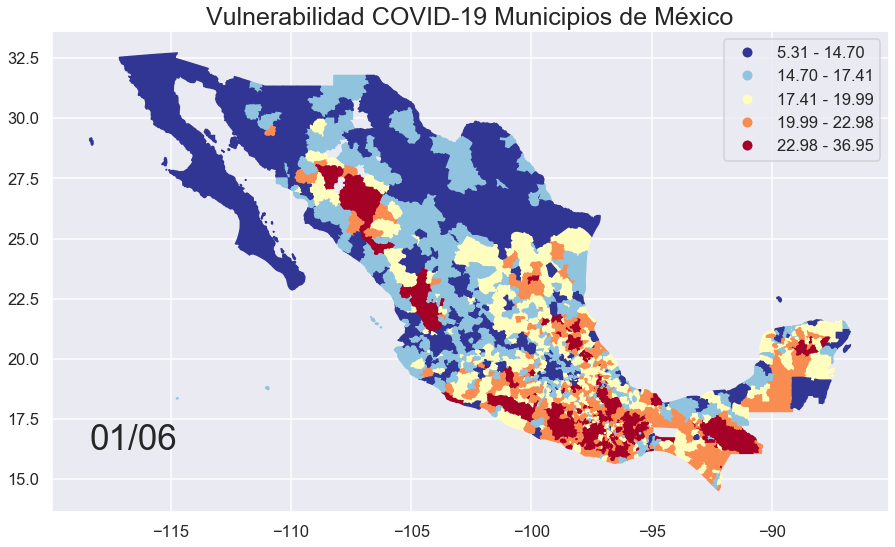

In [ ]:
df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 1)) &
                          (serie_vulnerabilidad.modelo == 'PLS')]

fig, ax = plt.subplots(figsize=(15, 10))
# cax = divider.append_axes("right", size="5%", pad=0.1)
fig = df[df.valor.notna()].plot(column='valor', 
                                cmap='RdYlBu_r',
                                scheme='Quantiles',
                                k=5,
                                ax=ax,
                                legend=True,
                                edgecolor='face')
# remove axis of chart
# fig.axis('off')
fig.set_title('Vulnerabilidad COVID-19 Municipios de México', \
          fontdict={'fontsize': '25', 'fontweight' : '3'})
# position the annotation to the bottom left
fig.annotate(datetime.datetime(2020, 6, 1).strftime("%d/%m"),
        xy=(0.1, .225), xycoords='figure fraction',
        horizontalalignment='left', verticalalignment='top',
        fontsize=35)


plt.show()

## Mapa de letalidad 1 de junio de 2020

La letalidad en esa fecha se distribuía de la siguiente manera.

In [ ]:
df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 1)) &
                          (serie_vulnerabilidad.modelo == 'PLS')]

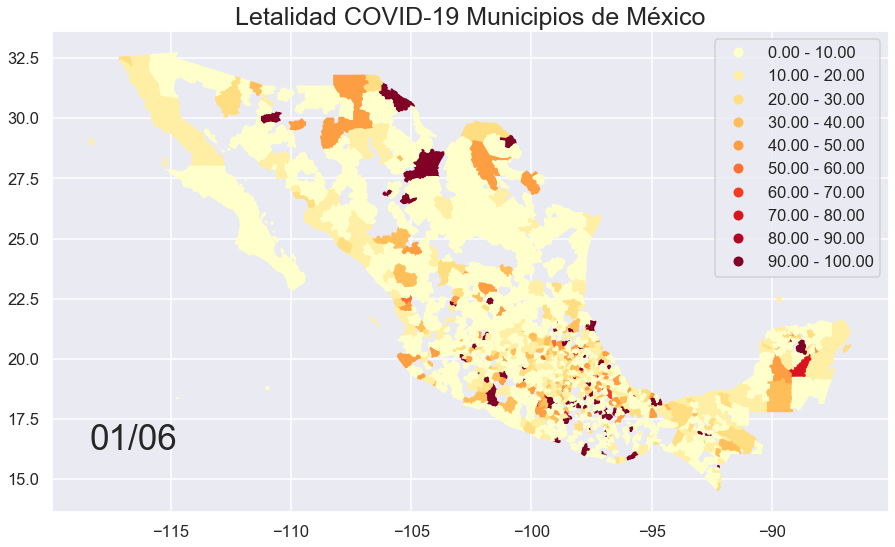

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
fig = df[df.tasa_covid_letal.notna()].plot(column='tasa_covid_letal', 
                                cmap='YlOrRd',
                                scheme='EqualInterval',
                                k=10,
                                ax=ax,
                                legend=True,
                                edgecolor='face')
# remove axis of chart
fig.set_title('Letalidad COVID-19 Municipios de México', \
          fontdict={'fontsize': '25', 'fontweight' : '3'})
# position the annotation to the bottom left
fig.annotate(datetime.datetime(2020, 6, 1).strftime("%d/%m"),
        xy=(0.1, .225), xycoords='figure fraction',
        horizontalalignment='left', verticalalignment='top',
        fontsize=35)


plt.show()

In [ ]:
table = df[['MUNICIPIO_RES',
    'ENTIDAD_RES',
    'conteo',
    'defunciones',
    'tasa_covid_letal']].sort_values(by='tasa_covid_letal', ascending=False).head(20)
display(Markdown(table.to_markdown(showindex=False)))

| MUNICIPIO_RES   | ENTIDAD_RES     |   conteo |   defunciones |   tasa_covid_letal |
|:----------------|:----------------|---------:|--------------:|-------------------:|
| IGUALA DE LA    | GUERRERO        |      116 |            51 |            43.9655 |
| INDEPENDENCIA   |                 |          |               |                    |
| NANCHITAL DE    | VERACRUZ DE     |       24 |             9 |            37.5    |
| LÁZARO CÁRDENAS | IGNACIO DE LA   |          |               |                    |
| DEL RÍO         | LLAVE           |          |               |                    |
| TEMIXCO         | MORELOS         |       68 |            24 |            35.2941 |
| TAXCO DE        | GUERRERO        |       54 |            19 |            35.1852 |
| ALARCÓN         |                 |          |               |                    |
| TEZONTEPEC DE   | HIDALGO         |       43 |            15 |            34.8837 |
| ALDAMA          |                 |          |               |                    |
| TLAXCO          | TLAXCALA        |       23 |             8 |            34.7826 |
| NATÍVITAS       | TLAXCALA        |       21 |             7 |            33.3333 |
| CUAUTEPEC DE    | HIDALGO         |       24 |             7 |            29.1667 |
| HINOJOSA        |                 |          |               |                    |
| TIHUATLÁN       | VERACRUZ DE     |       35 |            10 |            28.5714 |
|                 | IGNACIO DE LA   |          |               |                    |
|                 | LLAVE           |          |               |                    |
| NAVOLATO        | SINALOA         |      127 |            36 |            28.3465 |
| ACTOPAN         | HIDALGO         |       29 |             8 |            27.5862 |
| IXTLAHUACA      | MÉXICO          |       88 |            24 |            27.2727 |
| SAN ANTONINO    | OAXACA          |       22 |             6 |            27.2727 |
| CASTILLO        |                 |          |               |                    |
| VELASCO         |                 |          |               |                    |
| ATOTONILCO DE   | HIDALGO         |       22 |             6 |            27.2727 |
| TULA            |                 |          |               |                    |
| OTUMBA          | MÉXICO          |       26 |             7 |            26.9231 |
| TEPALCINGO      | MORELOS         |       31 |             8 |            25.8065 |
| JEREZ           | ZACATECAS       |       31 |             8 |            25.8065 |
| TIJUANA         | BAJA CALIFORNIA |     2108 |           541 |            25.6641 |
| ATITALAQUIA     | HIDALGO         |       28 |             7 |            25      |
| OCOSINGO        | CHIAPAS         |       32 |             8 |            25      |

## Mapa de letalidad 8 de julio

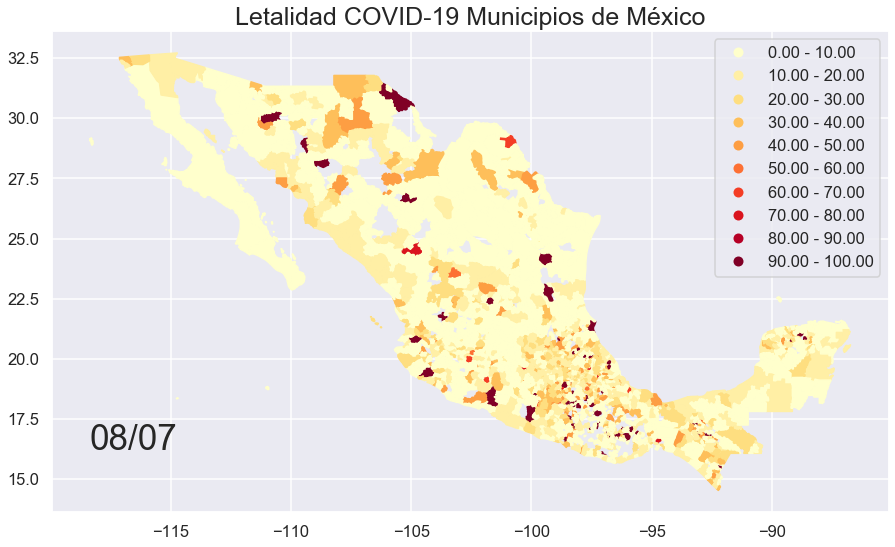

In [ ]:
fecha = datetime.datetime(2020, 7, 8)
df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == fecha) &
                          (serie_vulnerabilidad.modelo == 'PLS')]

fig, ax = plt.subplots(figsize=(15, 10))
divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1)
fig = df[df.tasa_covid_letal.notna()].plot(column='tasa_covid_letal', 
                                cmap='YlOrRd',
                                scheme='EqualInterval',
                                k=10,
                                ax=ax,
                                legend=True,
                                edgecolor='face')
# remove axis of chart
fig.set_title('Letalidad COVID-19 Municipios de México', \
          fontdict={'fontsize': '25', 'fontweight' : '3'})
# position the annotation to the bottom left
fig.annotate(fecha.strftime("%d/%m"),
        xy=(0.1, .225), xycoords='figure fraction',
        horizontalalignment='left', verticalalignment='top',
        fontsize=35)


plt.show()

In [ ]:
table = df[['MUNICIPIO_RES',
    'ENTIDAD_RES',
    'conteo',
    'defunciones',
    'valor',
    'tasa_covid_letal']].sort_values(by='tasa_covid_letal', ascending=False).head(10)
display(Markdown(table.to_markdown(showindex=False)))

| MUNICIPIO_RES   | ENTIDAD_RES   |   conteo |   defunciones |   valor |   tasa_covid_letal |
|:----------------|:--------------|---------:|--------------:|--------:|-------------------:|
| BENITO JUÁREZ   | SONORA        |       25 |            10 | 14.3116 |            40      |
| TACÁMBARO       | MICHOACÁN DE  |       24 |             9 | 15.9423 |            37.5    |
|                 | OCAMPO        |          |               |         |                    |
| MANLIO FABIO    | VERACRUZ DE   |       32 |            12 | 16.2492 |            37.5    |
| ALTAMIRANO      | IGNACIO DE LA |          |               |         |                    |
|                 | LLAVE         |          |               |         |                    |
| PUENTE DE IXTLA | MORELOS       |      142 |            52 | 16.3874 |            36.6197 |
| IXHUATLÁN DEL   | VERACRUZ DE   |       28 |            10 | 15.5695 |            35.7143 |
| SURESTE         | IGNACIO DE LA |          |               |         |                    |
|                 | LLAVE         |          |               |         |                    |
| IGUALA DE LA    | GUERRERO      |      231 |            81 | 15.3254 |            35.0649 |
| INDEPENDENCIA   |               |          |               |         |                    |
| ACANCEH         | YUCATÁN       |       49 |            17 | 15.3249 |            34.6939 |
| TIHUATLÁN       | VERACRUZ DE   |       67 |            23 | 17.3857 |            34.3284 |
|                 | IGNACIO DE LA |          |               |         |                    |
|                 | LLAVE         |          |               |         |                    |
| TEPALCINGO      | MORELOS       |       50 |            17 | 17.1139 |            34      |
| TEMIXCO         | MORELOS       |      128 |            43 | 15.2137 |            33.5938 |

## Lista 10 municipios más vulnerables

De acuerdo con el índice, los diez municipios más vulnerables son los siguientes. Un dato notable es que de los diez municipios más vulnerables seis no tienen coasos reportados. En general los municipios más vulnerables son municipios con muy pocos casos, o sin casos.

In [ ]:
campos_tablas = ['ENTIDAD_RES', 'MUNICIPIO_RES',
                  'valor',
                  'covid_confirmados_100k', 'tasa_covid_letal']
serie_vulnerabilidad.MUNICIPIO_RES = serie_vulnerabilidad.MUNICIPIO_RES.str.wrap(width=15)
serie_vulnerabilidad.ENTIDAD_RES = serie_vulnerabilidad.ENTIDAD_RES.str.wrap(width=15)

df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 1)) &
                         (serie_vulnerabilidad.modelo == 'PLS')].copy()
display(Markdown(df.sort_values(by='valor', ascending=False).head(10)[campos_tablas].to_markdown(showindex=False)))

| ENTIDAD_RES   | MUNICIPIO_RES   |   valor |   covid_confirmados_100k |   tasa_covid_letal |
|:--------------|:----------------|--------:|-------------------------:|-------------------:|
| DURANGO       | MEZQUITAL       | 36.9507 |                  7.39044 |                  0 |
| CHIHUAHUA     | BATOPILAS DE    | 36.4839 |                  0       |                nan |
|               | MANUEL GÓMEZ    |         |                          |                    |
|               | MORÍN           |         |                          |                    |
| GUERRERO      | COCHOAPA EL     | 35.6962 |                  0       |                nan |
|               | GRANDE          |         |                          |                    |
| NAYARIT       | DEL NAYAR       | 35.3905 |                  0       |                nan |
| OAXACA        | SAN JOSÉ        | 32.9254 |                 10.553   |                 50 |
|               | TENANGO         |         |                          |                    |
| CHIAPAS       | SITALÁ          | 32.4466 |                  0       |                nan |
| OAXACA        | SANTIAGO        | 31.7923 |                  0       |                nan |
|               | IXTAYUTLA       |         |                          |                    |
| CHIAPAS       | CHALCHIHUITÁN   | 31.773  |                  0       |                nan |
| VERACRUZ DE   | TEHUIPANGO      | 31.3928 |                  0       |                nan |
| IGNACIO DE LA |                 |         |                          |                    |
| LLAVE         |                 |         |                          |                    |
| VERACRUZ DE   | MIXTLA DE       | 31.1818 |                  0       |                nan |
| IGNACIO DE LA | ALTAMIRANO      |         |                          |                    |
| LLAVE         |                 |         |                          |                    |

## Los 10 municipios menos vulnerables

In [ ]:
df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 1)) &
                         ((serie_vulnerabilidad.modelo == 'PLS'))].copy()
display(Markdown(df.sort_values(by='valor').head(10)[campos_tablas].to_markdown(showindex=False)))

| ENTIDAD_RES   | MUNICIPIO_RES   |   valor |   covid_confirmados_100k |   tasa_covid_letal |
|:--------------|:----------------|--------:|-------------------------:|-------------------:|
| JALISCO       | GUADALAJARA     | 5.30899 |                  36.0491 |            9.9631  |
| NUEVO LEÓN    | MONTERREY       | 5.71144 |                  33.4271 |            7.18085 |
| CIUDAD DE     | MIGUEL HIDALGO  | 6.0974  |                 273.692  |            8.37344 |
| MÉXICO        |                 |         |                          |                    |
| CIUDAD DE     | CUAUHTÉMOC      | 6.2302  |                 267.587  |           11.1035  |
| MÉXICO        |                 |         |                          |                    |
| CIUDAD DE     | BENITO JUÁREZ   | 6.58398 |                 221.347  |            8.4375  |
| MÉXICO        |                 |         |                          |                    |
| CIUDAD DE     | GUSTAVO A.      | 7.37491 |                 276.473  |           12.6613  |
| MÉXICO        | MADERO          |         |                          |                    |
| PUEBLA        | PUEBLA          | 7.78931 |                 109.567  |            8.43632 |
| CHIHUAHUA     | CHIHUAHUA       | 7.9423  |                  40.8681 |           11.3402  |
| CIUDAD DE     | IZTAPALAPA      | 8.0097  |                 271.323  |           10.1908  |
| MÉXICO        |                 |         |                          |                    |
| CIUDAD DE     | TLALPAN         | 8.27731 |                 272.341  |            6.99677 |
| MÉXICO        |                 |         |                          |                    |

## Los 10 municipios con más de 500K habitantes más vulnerables

In [ ]:
pd.set_option('display.max_colwidth', 50)
df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 1)) &
                         ((serie_vulnerabilidad.modelo == 'PLS'))].copy()
datos_md = df[df.pob2020 > 500000].sort_values(by='valor',
                                         ascending=False).head(10)[campos_tablas].to_markdown(showindex=False)

display(Markdown(datos_md))

| ENTIDAD_RES     | MUNICIPIO_RES   |   valor |   covid_confirmados_100k |   tasa_covid_letal |
|:----------------|:----------------|--------:|-------------------------:|-------------------:|
| MÉXICO          | CHIMALHUACÁN    | 14.7763 |                 101.36   |           12.7397  |
| GUERRERO        | ACAPULCO DE     | 14.2748 |                 144.863  |            9.85222 |
|                 | JUÁREZ          |         |                          |                    |
| MÉXICO          | IXTAPALUCA      | 13.2243 |                 107.979  |           15.6303  |
| JALISCO         | TONALÁ          | 12.5329 |                  22.8505 |            9.09091 |
| JALISCO         | SAN PEDRO       | 12.0951 |                  16.5122 |            7.69231 |
|                 | TLAQUEPAQUE     |         |                          |                    |
| TAMAULIPAS      | MATAMOROS       | 12.0457 |                  58.5957 |           10.3125  |
| GUANAJUATO      | IRAPUATO        | 11.9282 |                  23.7432 |            4.13793 |
| BAJA CALIFORNIA | ENSENADA        | 11.8711 |                  56.3283 |           14.9007  |
| GUANAJUATO      | CELAYA          | 11.8411 |                  25.244  |           18.6567  |
| CHIAPAS         | TUXTLA          | 11.7139 |                 116.361  |            4.02075 |
|                 | GUTIÉRREZ       |         |                          |                    |

## Los 10 municipios con más de 500K habitantes menos vulnerables

In [ ]:
datos_md = df[df.pob2020 > 500000].sort_values(by='valor').head(10)[campos_tablas].to_markdown(showindex=False)

In [ ]:
display(Markdown(datos_md))

| ENTIDAD_RES   | MUNICIPIO_RES   |   valor |   covid_confirmados_100k |   tasa_covid_letal |
|:--------------|:----------------|--------:|-------------------------:|-------------------:|
| JALISCO       | GUADALAJARA     | 5.30899 |                  36.0491 |            9.9631  |
| NUEVO LEÓN    | MONTERREY       | 5.71144 |                  33.4271 |            7.18085 |
| CIUDAD DE     | CUAUHTÉMOC      | 6.2302  |                 267.587  |           11.1035  |
| MÉXICO        |                 |         |                          |                    |
| CIUDAD DE     | GUSTAVO A.      | 7.37491 |                 276.473  |           12.6613  |
| MÉXICO        | MADERO          |         |                          |                    |
| PUEBLA        | PUEBLA          | 7.78931 |                 109.567  |            8.43632 |
| CHIHUAHUA     | CHIHUAHUA       | 7.9423  |                  40.8681 |           11.3402  |
| CIUDAD DE     | IZTAPALAPA      | 8.0097  |                 271.323  |           10.1908  |
| MÉXICO        |                 |         |                          |                    |
| CIUDAD DE     | TLALPAN         | 8.27731 |                 272.341  |            6.99677 |
| MÉXICO        |                 |         |                          |                    |
| SONORA        | HERMOSILLO      | 8.3182  |                  80.228  |            2.7668  |
| YUCATÁN       | MÉRIDA          | 8.37524 |                 111.219  |            7.83582 |

# Datos

El índice de vulnerabilidad lo construimos relacionando indicadores de CONEVAL, INEGI y estadísticas CLUES, con la letalidad de COVID-19 observada en los municipios donde ya se han confirmado casos de infección de Sars-Cov-2.

Las fuentes de datos para el conjunto de indicadores pertenecen a cuatro categorías. La siguiente lista presenta la fuente y la categoría a la que pertence cada conjunto de indicadores:

1. Social:
    * Fuente: CONEVAL, rezago social, 2015
    * Producto: Índice de rezago social por municipio
    * URL: 
2. Economía:
    * Fuente: CONEVAL, pobreza, 2015
    * Producto: Indicadores de pobreza por municipio
    * URL: https://datos.gob.mx/busca/dataset/indicadores-de-pobreza-municipal-2010--2015
3. Salud:
    * Fuente: INEGI
    * Producto: estadísticas vitales, 2015
    * URL:
4. Infraestructura de salud:
    * Fuente: CLUES
    * Producto: 
    * URL:
    
    

# Método

Para construir el índice de vulnerabilidad integramos un conjunto de indicadores sociales, económicos y de salubridad y encontramos la combinación de estos que más se relaciona con el nivel de letalidad de COVID-19. Con esta combinación generamos el índice, el cuál nos indica el grado en que la población de un municipio es suceptible a tener complicaciones por COVID-19. 

Como proxy de vulnerabilidad utilizamos la letalidad observada de COVID-19 en cada municipio y ajustamos una regresión usando como variables independientes indicadores de los municipios sobre carencias sociales, de pobreza, de salud y de infrestructura de salud. Para realizar este ajuste sólo consideramos municipios con al menos diez casos confirmados. 

El método para construir este índice es regresión por mínimos cuadrados parciales. Este método busca la combinación de indicadores que explica más sobre la letalidad de COVID-19 en una población. Del ajuste obtenemos una función que calcula el índice de vulnerabilidad para cada municipio, y coeficientes para cada indicador, los cuáles nos indican la relevancia que cada uno tiene en el resultado del índice, dada por la magnitud del coeficiente, y según el signo también sabemos en que dirección se asocia el indicador con la letalidad, por ejemplo, como veremos más adelante, el indicador *npnv* (porcentaje de la población que no es pobre ni vulnerable de acuerdo con CONEVAL) es de los indicadores con mayor peso pero en sentido inverso.  

## Especificación modelo

* **Fechas de datos para análisis**: 24 de abril al 8 de julio de 2020
* **URL**: [Datos abiertos de COVID-19](https://www.gob.mx/salud/documentos/datos-abiertos-bases-historicas-direccion-general-de-epidemiologia): https://www.gob.mx/salud/documentos/datos-abiertos-bases-historicas-direccion-general-de-epidemiologia
* **Implementación PLS**:  [Scikit Learn - PLSRegression](https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html#sklearn.cross_decomposition.PLSRegression)

## Descripción Regresión por mínimos cuadrados parciales 
(PLS por sus siglas en inglés)

\begin{equation}
X = T P^T + E \\
y = u q^T + f
\end{equation}

Referencia: https://en.wikipedia.org/wiki/Partial_least_squares_regression

# Detalle de resultados

Los siguientes mapas nos muestran como cambia la letalidad y el efecto en el mapa de vulnerabilidad. En este ejemplo vemos el cambio que hubo en un mes. Lo que nos interesa de esta comparación es que el mapa de vulnerabilidad no tiene cambios muy fuertes. 

## Mapas de letalidad y vulnerabilidad

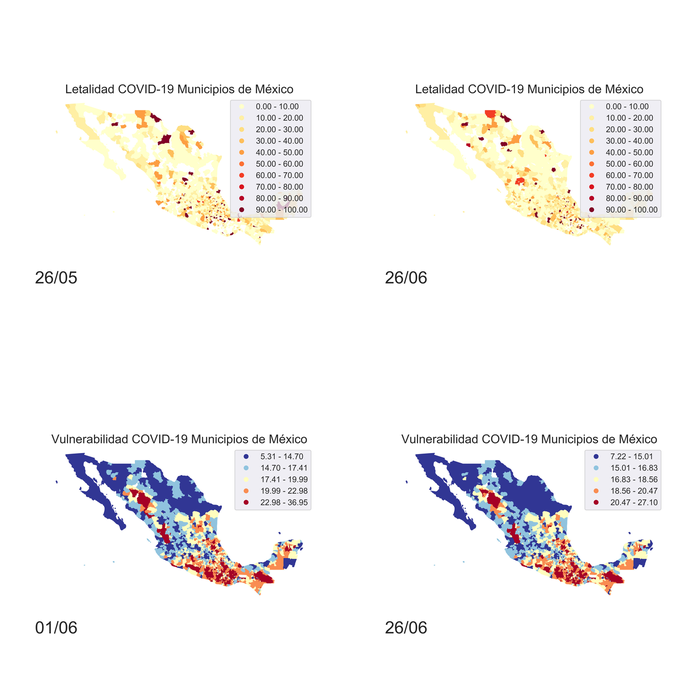

In [ ]:
nb_setup.images_gridconcat([['resultados/mapas/letalidad/200526_letalidad.jpg',
                            'resultados/mapas/letalidad/200626_letalidad.jpg',],
                            ['resultados/mapas/vulnerabilidad/20_06_01_vulnerabilidad.jpg',
                            'resultados/mapas/vulnerabilidad/20_06_26_vulnerabilidad.jpg']], width=1000)

## Análisis por entidades

En esta sección presentamos como se distribuyen la letalidad y el índice de vulnerabilidad por entidad. El siguiente mapa muestra la vulnerabilidad promedio por entidad. 

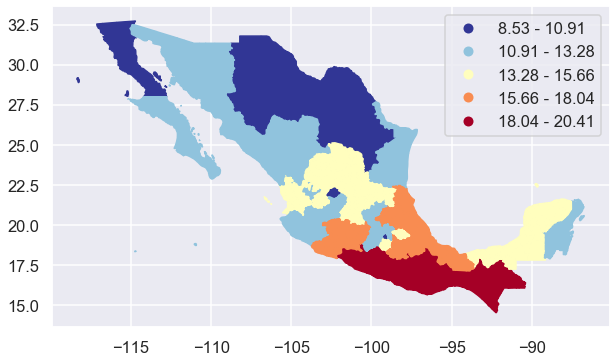

In [ ]:
vulnerabilidad_entidad = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 1))  &
                                             (serie_vulnerabilidad.modelo == 'PLS')]
vulnerabilidad_entidad = vulnerabilidad_entidad[['ENTIDAD_RES', 'geometry', 'letalidad_entidad', 'valor_entidad']]
vulnerabilidad_entidad.plot(column='valor_entidad', cmap='RdYlBu_r', scheme="EqualInterval", figsize=(10, 10),
                            legend=True, k=5, edgecolor="face")
plt.savefig('vulnerabilidad_entidades_200601.png')

El siguiente muestra la letalidad promedio por entidad al 26 de junio.

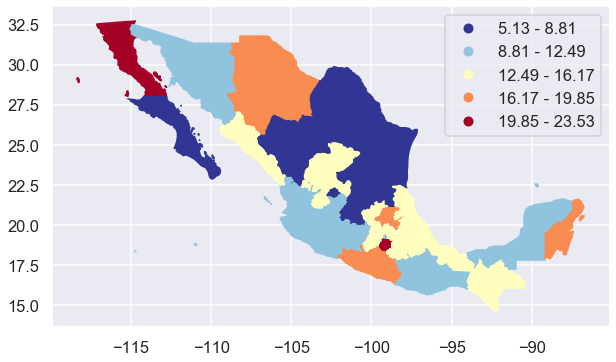

In [ ]:
letalidad_entidad = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 26))  &
                                         (serie_vulnerabilidad.modelo == 'PLS')]
letalidad_entidad = letalidad_entidad[['ENTIDAD_RES', 'geometry', 'letalidad_entidad', 'valor_entidad']].drop_duplicates()
letalidad_entidad.plot(column='letalidad_entidad', cmap='RdYlBu_r', scheme="EqualInterval", figsize=(10, 10),
                            legend=True, k=5, edgecolor="face")
plt.savefig('letalidad_entidades_200626.png')

In [ ]:
datos = letalidad_entidad.sort_values(by='letalidad_entidad', ascending=False)
datos_md = datos.drop(columns='geometry').drop_duplicates().to_markdown(showindex=False)
display(Markdown(datos_md))

| ENTIDAD_RES     |   letalidad_entidad |   valor_entidad |
|:----------------|--------------------:|----------------:|
| BAJA CALIFORNIA |            23.5277  |         10.7042 |
| MORELOS         |            23.1926  |         14.857  |
| QUINTANA ROO    |            19.0602  |         12.709  |
| GUERRERO        |            18.9011  |         17.9891 |
| CHIHUAHUA       |            17.9144  |         11.3144 |
| HIDALGO         |            17.2703  |         15.5502 |
| MÉXICO          |            15.7258  |         13.8835 |
| SINALOA         |            15.2084  |         12.4491 |
| PUEBLA          |            15.2067  |         15.4553 |
| TLAXCALA        |            15.0853  |         15.2807 |
| VERACRUZ DE     |            14.6667  |         16.5058 |
| IGNACIO DE LA   |                     |                 |
| LLAVE           |                     |                 |
| QUERÉTARO       |            13.7591  |         12.8675 |
| ZACATECAS       |            13.2378  |         14.6758 |
| CHIAPAS         |            12.6339  |         18.6402 |
| NAYARIT         |            12.2464  |         13.8273 |
| CIUDAD DE       |            11.557   |         10.0437 |
| MÉXICO          |                     |                 |
| TABASCO         |            10.4615  |         14.698  |
| CAMPECHE        |            10.4033  |         14.3496 |
| SONORA          |            10.4021  |         11.9341 |
| OAXACA          |            10.3945  |         18.1319 |
| MICHOACÁN DE    |            10.2526  |         15.878  |
| OCAMPO          |                     |                 |
| YUCATÁN         |             9.92907 |         13.9091 |
| COLIMA          |             9.84811 |         13.2116 |
| JALISCO         |             8.91599 |         12.2803 |
| DURANGO         |             8.25582 |         13.4316 |
| NUEVO LEÓN      |             6.72314 |         10.8342 |
| TAMAULIPAS      |             6.71354 |         12.9459 |
| SAN LUIS POTOSÍ |             5.95715 |         14.4452 |
| AGUASCALIENTES  |             5.57109 |         11.8406 |
| COAHUILA DE     |             5.44444 |         11.5035 |
| ZARAGOZA        |                     |                 |
| BAJA CALIFORNIA |             5.39425 |         12.2614 |
| SUR             |                     |                 |
| GUANAJUATO      |             5.13148 |         13.6167 |

### Letalidad por entidad

El siguiente diagrama de cajas muestra cómo se distribuye la letalidad para cada entidad, considerando municipios con más de **3** defunciones por COVID-19 reportadas. Cada punto es un municipio donde la altura representa la letalidad de COVID-19 observada en ese muncipio. 

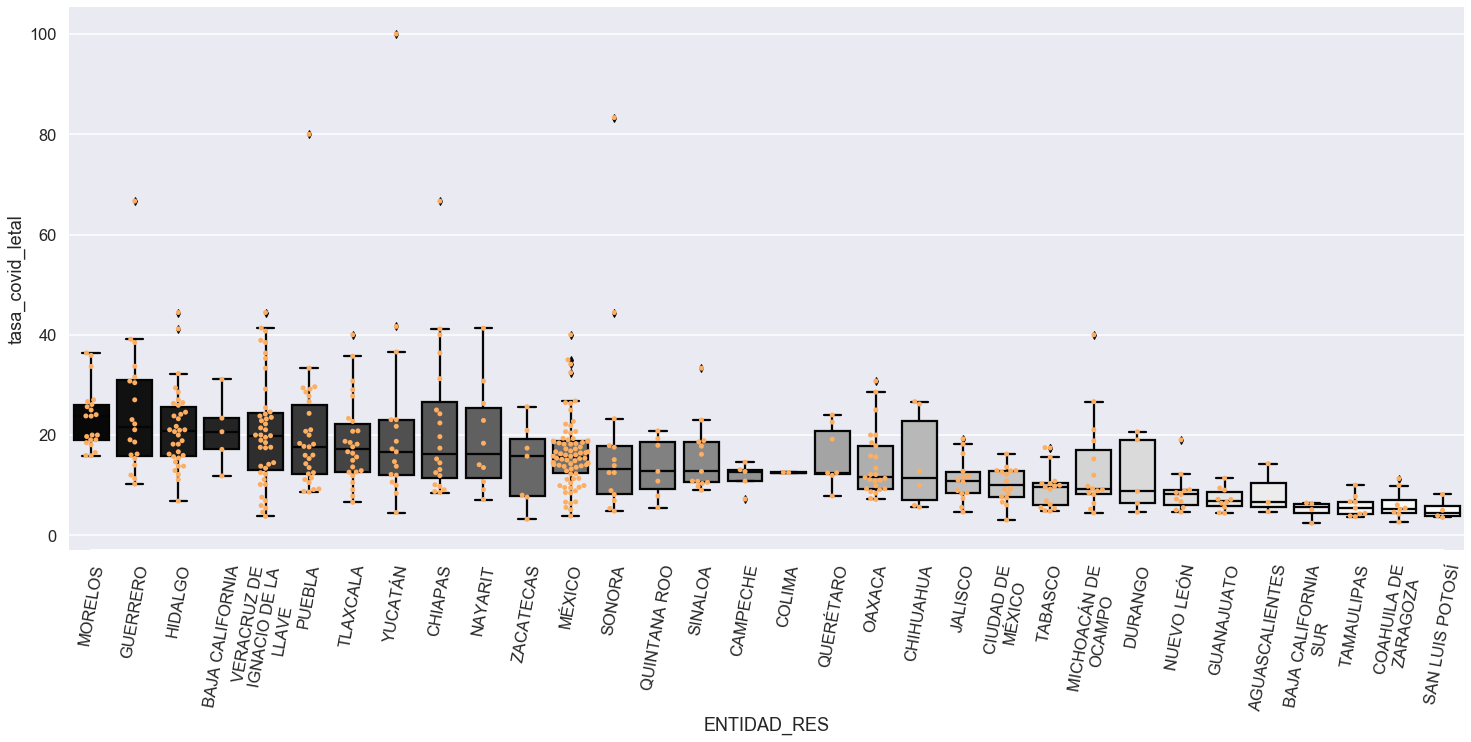

In [ ]:
f, ax = plt.subplots(figsize=(25, 10))
df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 26)) &
                          (serie_vulnerabilidad.defunciones > 3)  &
                          (serie_vulnerabilidad.modelo == 'PLS')].copy()
df['mean_val'] = df.groupby('ENTIDAD_RES')['tasa_covid_letal'].transform('median')
df.sort_values(by='mean_val', ascending=False, inplace=True)

sns.boxplot(data=df, y='tasa_covid_letal', x='ENTIDAD_RES', saturation=0.3, palette='Greys_r')
sns.swarmplot(data=df, y='tasa_covid_letal', x='ENTIDAD_RES', color='#fdae61')
plt.xticks(rotation=80)
sns.despine(trim=True, left=True)

De los municpios desplegados arriba los municipios con mayor letalidad son:

In [ ]:
datos_md = df.sort_values(by='tasa_covid_letal', ascending=False)[campos_tablas].head(10).to_markdown(showindex=False)
display(Markdown(datos_md))

| ENTIDAD_RES   | MUNICIPIO_RES   |   valor |   covid_confirmados_100k |   tasa_covid_letal |
|:--------------|:----------------|--------:|-------------------------:|-------------------:|
| YUCATÁN       | SANAHCAT        | 16.4978 |                 218.699  |           100      |
| SONORA        | SAN IGNACIO RÍO | 16.5514 |                  38.2726 |            83.3333 |
|               | MUERTO          |         |                          |                    |
| PUEBLA        | CHILCHOTLA      | 21.3901 |                  23.8277 |            80      |
| GUERRERO      | HUAMUXTITLÁN    | 17.4842 |                  38.0638 |            66.6667 |
| CHIAPAS       | IXTAPANGAJOYA   | 19.764  |                 100.2    |            66.6667 |
| HIDALGO       | CARDONAL        | 17.6312 |                  45.3332 |            44.4444 |
| VERACRUZ DE   | AYAHUALULCO     | 21.4395 |                  32.1371 |            44.4444 |
| IGNACIO DE LA |                 |         |                          |                    |
| LLAVE         |                 |         |                          |                    |
| SONORA        | BENITO JUÁREZ   | 15.0692 |                  75.4939 |            44.4444 |
| YUCATÁN       | HALACHÓ         | 17.9491 |                  55.5042 |            41.6667 |
| VERACRUZ DE   | NANCHITAL DE    | 13.8958 |                 240.269  |            41.3333 |
| IGNACIO DE LA | LÁZARO CÁRDENAS |         |                          |                    |
| LLAVE         | DEL RÍO         |         |                          |                    |

El criterio de desplegar municipios con más de 3 defunciones se aplicó para limpiar los datos. A continuación se presenta el mismo diagrama pero considerando todos los municipios con casos de Sars-CoV-2, se observa que hay varios municipios con cero defunciones y otros con letalidad de 100%, estos dos casos extremos se presentan con mayor frecuencia y se salen de la distribución de valores de letalidad, esto sucede en general con municpios que han reportado pocos casos. 

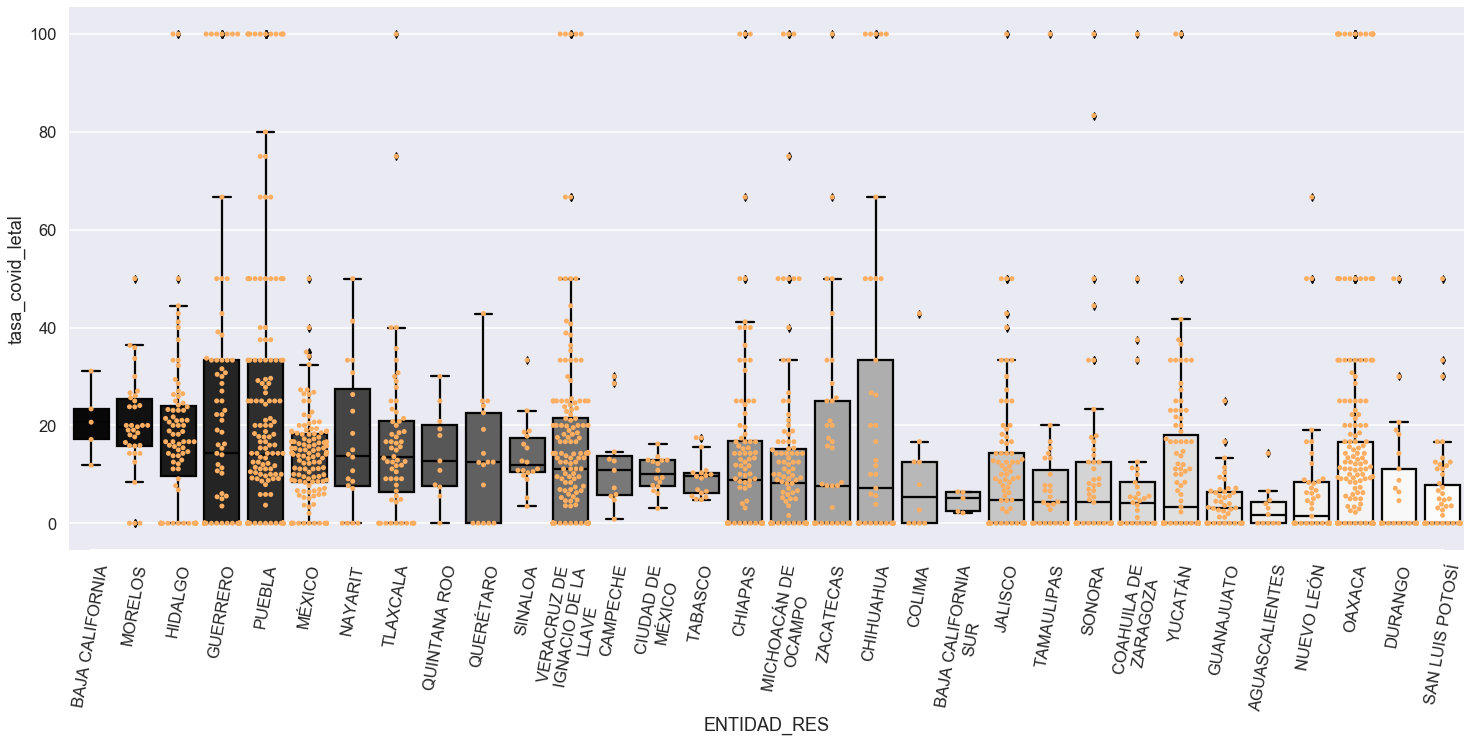

In [ ]:
f, ax = plt.subplots(figsize=(25, 10))
df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 26)) &
                          (serie_vulnerabilidad.modelo == 'PLS')].copy()
df['mean_val'] = df.groupby('ENTIDAD_RES')['tasa_covid_letal'].transform('median')
df.sort_values(by='mean_val', ascending=False, inplace=True)

sns.boxplot(data=df[df.conteo > 0], y='tasa_covid_letal', x='ENTIDAD_RES', saturation=0.3, palette='Greys_r')
sns.swarmplot(data=df[df.conteo > 0], y='tasa_covid_letal', x='ENTIDAD_RES', color='#fdae61')
plt.xticks(rotation=80)
sns.despine(trim=True, left=True)

### Vulnerabilidad por entidad

La siguiente gráfica muestra la distribución de vulnerabilidad de los municipios por entidad. Al igual que en la anterior, cada punto representa un municipio y la posición en el eje *y* está dada por el valor del índice de vulnerabilidad. El orden en el que se despliegan las entidades está dado por la mediana de vulnerabilidad.

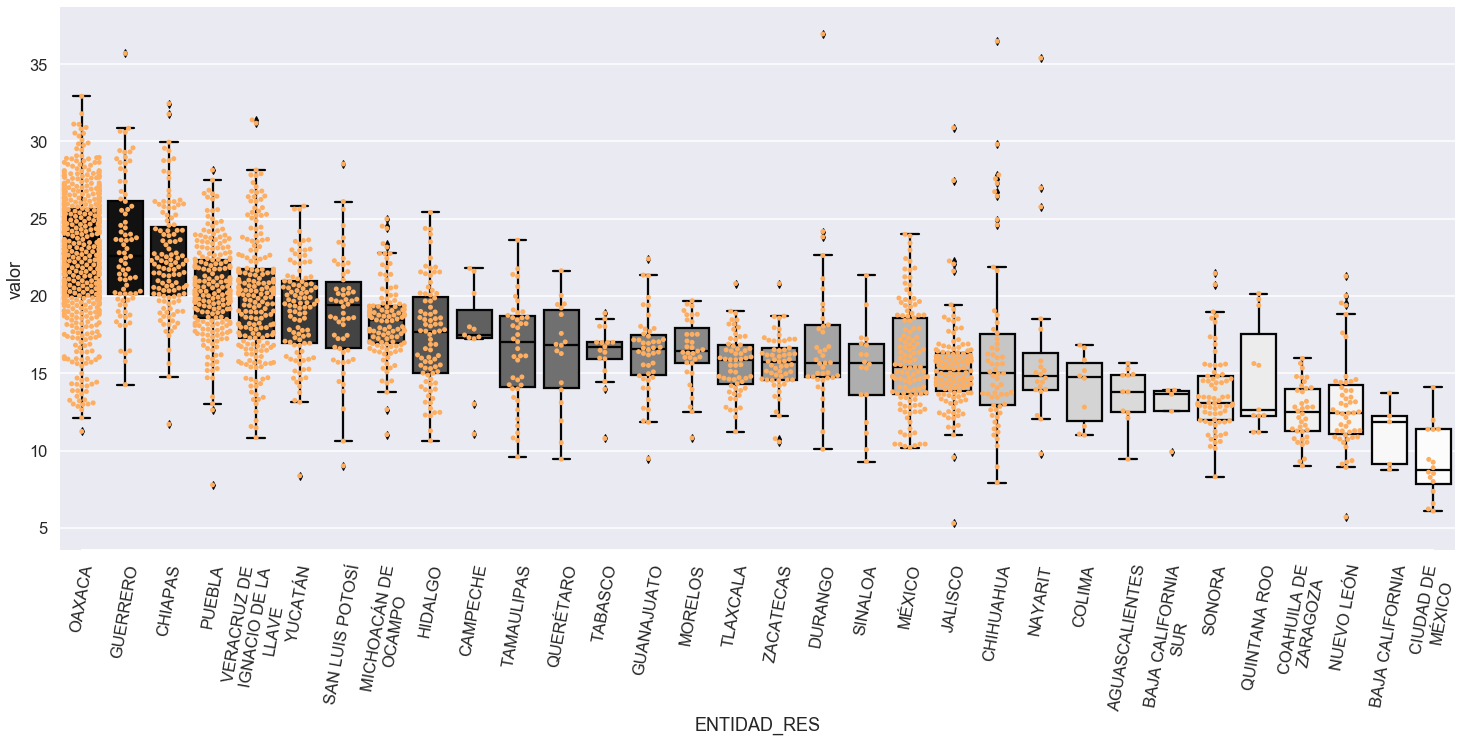

In [ ]:
f, ax = plt.subplots(figsize=(25, 10))
df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 1))
                           &
                          (serie_vulnerabilidad.modelo == 'PLS')].copy()
df['mean_val'] = df.groupby('ENTIDAD_RES')['valor'].transform('median')
sns.boxplot(data=df.sort_values(by='mean_val', ascending=False), y='valor', x='ENTIDAD_RES', palette='Greys_r')
sns.swarmplot(data=df.sort_values(by='mean_val', ascending=False), y='valor', x='ENTIDAD_RES', color='#fdae61')
plt.xticks(rotation=80)
sns.despine(trim=True, left=True)

### Relación entre el índice de vulnerabilidad y la letalidad

In [ ]:
reg_df = df[(df.defunciones > 0) & df.valor.notna()]
corr, _ = spearmanr(reg_df.tasa_covid_letal, reg_df.valor)

Los resultados muestran que para municipios donde existen defunciones reportadas, la correlación entre el índice de vulnerabilidad y la letalidad es positiva. Si calculamos la correlación de Spearman entre letalidad y vulnerabilidad para los municipios con al menos una defunción obtenemos:

In [ ]:
print('Correlación de Spearman: %.3f' % corr)

Correlación de Spearman: 0.509


##### Si cambiamos a municipios con al menos 5 defunciones reportadas, la correlación aumenta aproximadamente 15% a:

In [ ]:
reg_df = df[(df.defunciones > 5) & df.valor.notna()]
corr, _ = spearmanr(reg_df.tasa_covid_letal, reg_df.valor)

In [ ]:
print('Correlación de Spearman: %.3f' % corr)

Correlación de Spearman: 0.543


En los siguientes diagramas de dispersión mostramos esta relación. En el primer diagrama desplegamos todos los municipios con al menos una defunción reportada. Ahí podemos ver las líneas verticales de puntos generadas por municipios con pocas defunciones reportadas (entre una y tres defunciones).

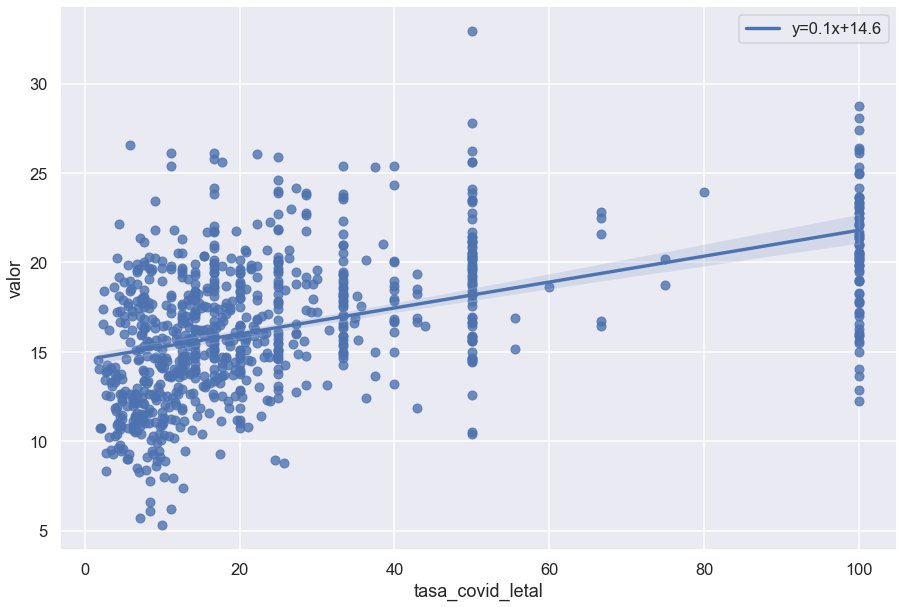

In [ ]:
reg_df = df[(df.defunciones > 0) & df.valor.notna()]
slope, intercept, r_value, p_value, std_err = linregress(reg_df['tasa_covid_letal'], reg_df['valor'])

f, ax = plt.subplots(figsize=(15, 10))
sns.regplot(data=reg_df, x='tasa_covid_letal', y='valor',
            line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

Si eliminamos esos municipios y desplegamos unicamente los que tienen al menos 5 defunciones reportadas se eliminan por completo esas líneas y mejora la relación entre las variables.

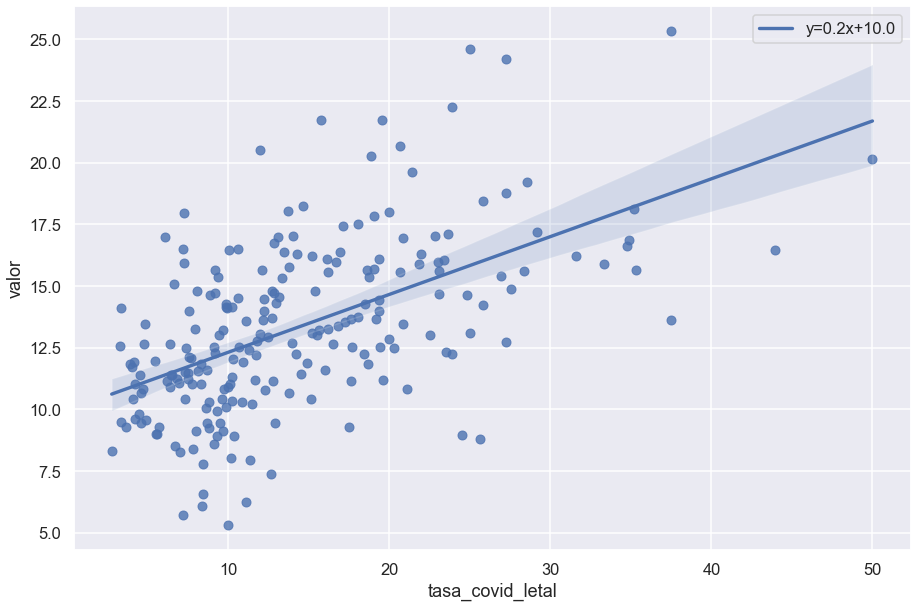

In [ ]:
reg_df = df[(df.defunciones > 5)]
slope, intercept, r_value, p_value, std_err = linregress(reg_df['tasa_covid_letal'], reg_df['valor'])

f, ax = plt.subplots(figsize=(15, 10))
sns.regplot(data=reg_df, x='tasa_covid_letal', y='valor',
           line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

## Serie de modelos PLS (24/04/2020 - 15/06/2020)

El ajuste de la regresión por PLS asigna coeficientes a cada uno de los indicadores que estamos considerando, donde la magnitud del coeficiente nos indica el tamaño de la relación que se encontró entre el indicador y la letalidad, y el signo nos indica si la relación es proporcional, es decir, si valores grandes del indicador se relacionan con alta vulnerabilidad, o es inversamente proporcional, si conforme crece el valor del indicador decrece el de vulnerabilidad.

El siguiente es un análisis de los modelos resultantes de ajustar una regresión por cada conjunto de datos publicado en el periódo que va del 24/04/2020 al 15/06/2020, es decir para cada día se calculó un modelo de vulnerabilidad. A continuación mostramos las descripciones de los indicadores y cómo se mueven sus coeficientes conforme cambian los datos.

### Descripción de los indicadores

In [ ]:
modelos['mediana'] = modelos.groupby(['caracteristica', 'modelo'])['coef'].transform('median')
modelos_pls = modelos[(modelos.dia_ajuste <= datetime.datetime(2020, 6, 26)) & (modelos.modelo == 'PLS')].copy()


In [ ]:
# from ipypublish import nb_setup
# pd = nb_setup.setup_pandas(escape_latex=False)

lista_cars = list(modelos_pls.sort_values(by='mediana', ascending=False)["caracteristica"].drop_duplicates())
pd.set_option('display.max_colwidth', 0)

diccionario_indicadores = diccionario_indicadores.set_index('campo').loc[lista_cars].reset_index()
diccionario_indicadores.campo = diccionario_indicadores.campo.str.strip()
diccionario_indicadores.descriptor = diccionario_indicadores.descriptor.str.wrap(width=60)
diccionario_indicadores.descriptor = diccionario_indicadores.descriptor.str.strip()
dicc_md = diccionario_indicadores.to_markdown(showindex=False)
display(Markdown(dicc_md))

| campo                     | descriptor                                                                              |
|:--------------------------|:----------------------------------------------------------------------------------------|
| carencias                 | %Población con al menos una carencia social                  |
| vnl_2015                  | Viviendas que no disponen de lavadora,2015                   |
| bi_2015                   | 15 años y más con educación básica incompleta,2015           |
| irs_2015                  | Índice de rezago social,2015                                 |
| ic_segsoc                 | %Carencia por acceso a la seguridad social                   |
| pobreza                   | % Población en situación de pobreza                          |
| pobreza_m                 | %Población en situación de pobreza moderada                  |
| ic_rezedu                 | %Indicadores de carencia social  Rezago educativo            |
| plb                       | %Población con igreso inferior a la línea de bienestar       |
| plbm                      | %Población con ingreso inferior a la línea de bienestar      |
|                           | mínimo                                                       |
| an_2015                   | 15 años y más analfabetas,2015                               |
| carencias3                | %Población con al menos tres carencias sociales              |
| vnr_2015                  | Viviendas que no disponen de refrigerador,2015               |
| ic_ali                    | %Carencia por acceso a la alimentación                       |
| ic_sbv                    | %Carencia por acceso a los servicios básicos en la vivienda  |
| ic_cv                     | %Carencia por calidad y espacios en la vivienda              |
| vpt_2015                  | Viviendas piso  de tierra,2015                               |
| pobreza_e                 | %Población en situación de pobreza extrema                   |
| vne_2015                  | Viviendas que no disponen de energía eléctrica,2015          |
| vna_2015                  | Viviendas sin Agua,2015                                      |
| vns_2015                  | Viviendas sin sanitario,2015                                 |
| vnd_2015                  | Viviendas que no disponen de drenaje,2015                    |
| tasa_diabetes             | Diabetes mellitus.                                           |
| ne614_015                 | 6 a 14 años que no asisten a la escuela,2015                 |
| hospitales_pemex          | Unidades econmicas dedicadas principalmente a proporcionar                                                              |
|                           | servicios médicos, que cuentan con las instalaciones para                                                               |
|                           | la hospitalizaci³n de los pacientes.                                                                                    |
| vul_car                   | %Población vulnerable por carencias sociales                 |
| ic_asalud                 | %Carencia por acceso a los servicios de salud                |
| sins_15                   | Porcentaje de Población  sin derechohabiencia a salud,2015   |
| tasa_cardiacas            | Enfermedades del sistema circulatorio, Fiebre reumática      |
|                           | aguda y enfermedades cardí­acas reumáticas crónicas,         |
|                           | Enfermedades hipertensivas, Enfermedades isquí©micas del     |
|                           | corazón, Otras enfermedades del corazón, Enfermedades        |
|                           | cerebrovasculares y Aterosclerosis.                          |
| porc_carencia_salud       | Se considera que una persona se encuentra en situación de    |
|                           | carencia por acceso a los servicios de salud cuando:  No     |
|                           | cuenta con adscripción o derecho a recibir servicios médicos |
|                           | de alguna institución que los presta, incluyendo el Seguro   |
|                           | Popular, las instituciones públicas de seguridad social      |
|                           | (IMSS, ISSSTE federal o estatal, Pemex, Ejí©rcito o Marina)  |
|                           | o los servicios médicos privados.                            |
| hospitales_semar          | Unidades econmicas dedicadas principalmente a proporcionar                             |
|                           | servicios mdicos, que cuentan con las instalaciones para la                            |
|                           | hospitalización de los pacientes.                                                       |
| hospitales_privados       | Unidades económicas dedicadas principalmente a proporcionar  |
|                           | servicios médicos, que cuentan con las instalaciones para la |
|                           | hospitalización de los pacientes.                            |
| tasa_pulmonares           | Enfermedades del sistema respiratorio, Influenza (gripe),    |
|                           | Neumoní­a, Otras infecciones agudas de las ví­as             |
|                           | respiratorias inferiores y Enfermedades crónicas de las      |
|                           | ví­as respiratorias inferiores.                              |
| tasa_cancer               | Tumores (neoplasias), Tumores malignos del labio, de la      |
|                           | cavidad bucal y de la faringe, Tumor maligno del esófago,    |
|                           | Tumor maligno del estómago, Tumor maligno del colon, del     |
|                           | recto y del ano, Tumor maligno del hí­gado y de las ví­as    |
|                           | biliares intrahepáticas, Tumor maligno del páncreas, Tumor   |
|                           | maligno de la laringe, Tumor maligno de la tráquea, de los   |
|                           | bronquios y del pulmón, Melanoma maligno de la piel, Tumor   |
|                           | maligno de la mama, Tumor maligno del cuello del útero,      |
|                           | Tumor maligno de otras partes y de las no especificadas del  |
|                           | útero, Tumor maligno del ovario, Tumor maligno de la         |
|                           | próstata, Tumor maligno de la vejiga urinaria, Tumor maligno |
|                           | de las meninges, del encí©falo y de otras partes del sistema |
|                           | nervioso central, Linfoma no Hodgkin, Mieloma múltiple y     |
|                           | tumores malignos de cí©lulas plasmáticas y Leucemia.         |
| hospitales_sme            | Unidades económicas dedicadas principalmente a proporcionar  |
|                           | servicios médicos, que cuentan con las instalaciones para la |
|                           | hospitalización de los pacientes.                            |
| total_de_camas_privados   | Unidades económicas dedicadas principalmente a proporcionar  |
|                           | servicios médicos, que cuentan con las instalaciones para la |
|                           | hospitalización de los pacientes.                            |
| hospitales_imss           | Unidades económicas dedicadas principalmente a proporcionar  |
|                           | servicios médicos, que cuentan con las instalaciones para la |
|                           | hospitalización de los pacientes.                            |
| hospitales_sedena         | Unidades económicas dedicadas principalmente a proporcionar  |
|                           | servicios médicos, que cuentan con las instalaciones para la |
|                           | hospitalización de los pacientes.                            |
| consulto_1                | Unidades económicas de dicadas principalmente a proporcionar |
|                           | servicios de consulta médica externa general o especializada |
|                           | (como servicios médicos especializados en cardiología,       |
|                           | gastroenterología, otorrinolaringología, ginecología,        |
|                           | homeopatí­a, nutrición, psiquiatrí­a, oftalmología)          |
|                           | prestados por profesionistas con estudios mí­nimos de        |
|                           | licenciatura en medicina.                                    |
| hospitales_ssa            | Unidades económicas dedicadas principalmente a proporcionar  |
|                           | servicios médicos, que cuentan con las instalaciones para la |
|                           | hospitalización de los pacientes.                            |
| consultori                | Unidades económicas de dicadas principalmente a proporcionar |
|                           | servicios de consulta médica externa general o especializada |
|                           | (como servicios médicos especializados encardiología,        |
|                           | gastroenterología, otorrinolaringología, ginecología,        |
|                           | homeopatí­a, nutrición, psiquiatrí­a, oftalmología)          |
|                           | prestados por profesionistas con estudios mí­nimos de        |
|                           | licenciatura en medicina.                                    |
| hospitales_issste         | Unidades económicas dedicadas principalmente a proporcionar  |
|                           | servicios médicos, que cuentan con las instalaciones para la |
|                           | hospitalización de los pacientes.                            |
| total_camas               | Unidades económicas dedicadas principalmente a proporcionar  |
|                           | servicios médicos, que cuentan con las instalaciones para la |
|                           | hospitalización de los pacientes.                            |
| farmacias                 | Unidades económicas dedicadas principalmente al comercio al  |
|                           | por menor de medicamentos, productos naturistas y            |
|                           | complementos alimenticios para consumo humano.               |
| total_camas_publicos      | Unidades económicas dedicadas principalmente a proporcionar  |
|                           | servicios médicos, que cuentan con las instalaciones para la |
|                           | hospitalización de los pacientes.                            |
| total_hospitales_publicos | Unidades económicas dedicadas principalmente a proporcionar  |
|                           | servicios médicos, que cuentan con las instalaciones para la |
|                           | hospitalización de los pacientes.                            |
| vul_ing                   | %Población vulnerable por ingresos                           |
| lmex_2015                 | Lugar que ocupa en el contexto nacional,2015                 |
| npnv                      | %Población no pobre y no vulnerable                          |

### Distribución de valores de coeficientes por indicador

Este diagrama de cajas muestra los indicadores ordenados con respecto a la mediana de sus coeficientes, en él podemos ver el rango en el que se movieron los coeficientes a lo largo del periodo. Es importante notar que aunque los coeficientes de algunos indicadores se mueven en rangos relativamente amplios, en su mayoría se mantienen o en valores positivos o en negativos. 

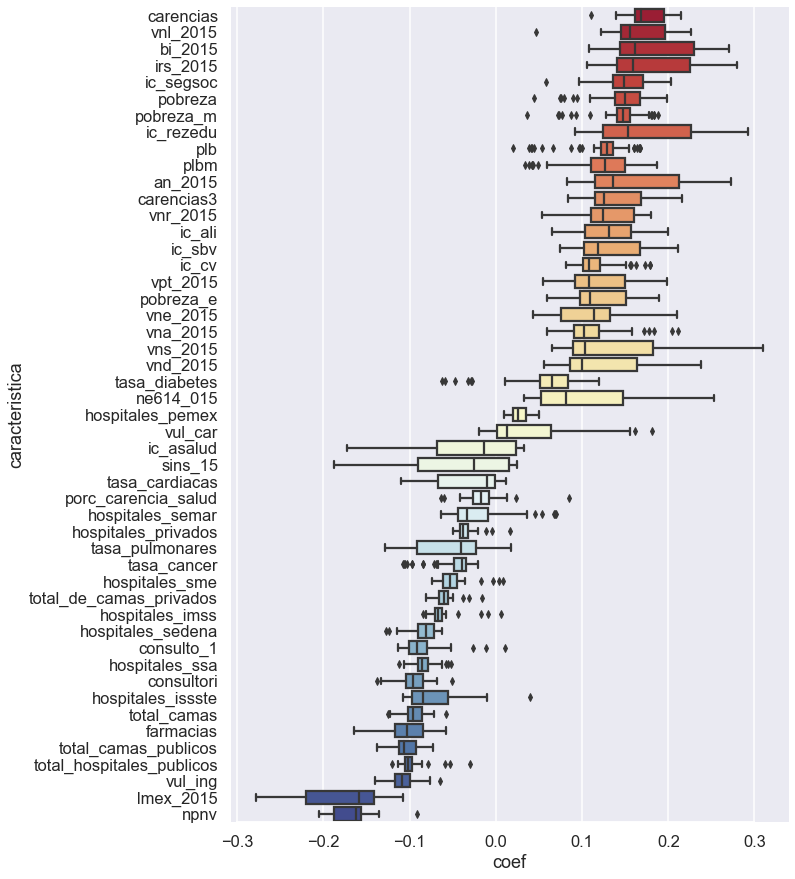

In [ ]:
# pd.set_option('display.max_colwidth', 50)
# Plot the orbital period with horizontal boxes
f, ax = plt.subplots(figsize=(10, 15))
sns.boxplot(y="caracteristica", x="coef", data=modelos_pls.sort_values(by='mediana', ascending=False), palette='RdYlBu')
sns.despine(trim=True, left=True)

### Series de tiempo de coeficientes por indicador

Las siguientes gráficas muestran cómo cambian los coeficientes de los indicadores conforme avanzamos en el día de publicación del conjunto de datos. En general se puede ver que los coeficientes se estabilizan a medida que avanza el tiempo. Además de entender cómo cambia el resultado del ajuste conforme se actualizan los datos, este análisis es una herramienta que podría ayudarnos a detectar cambios en el patrón de letalidad de la epidemia.  

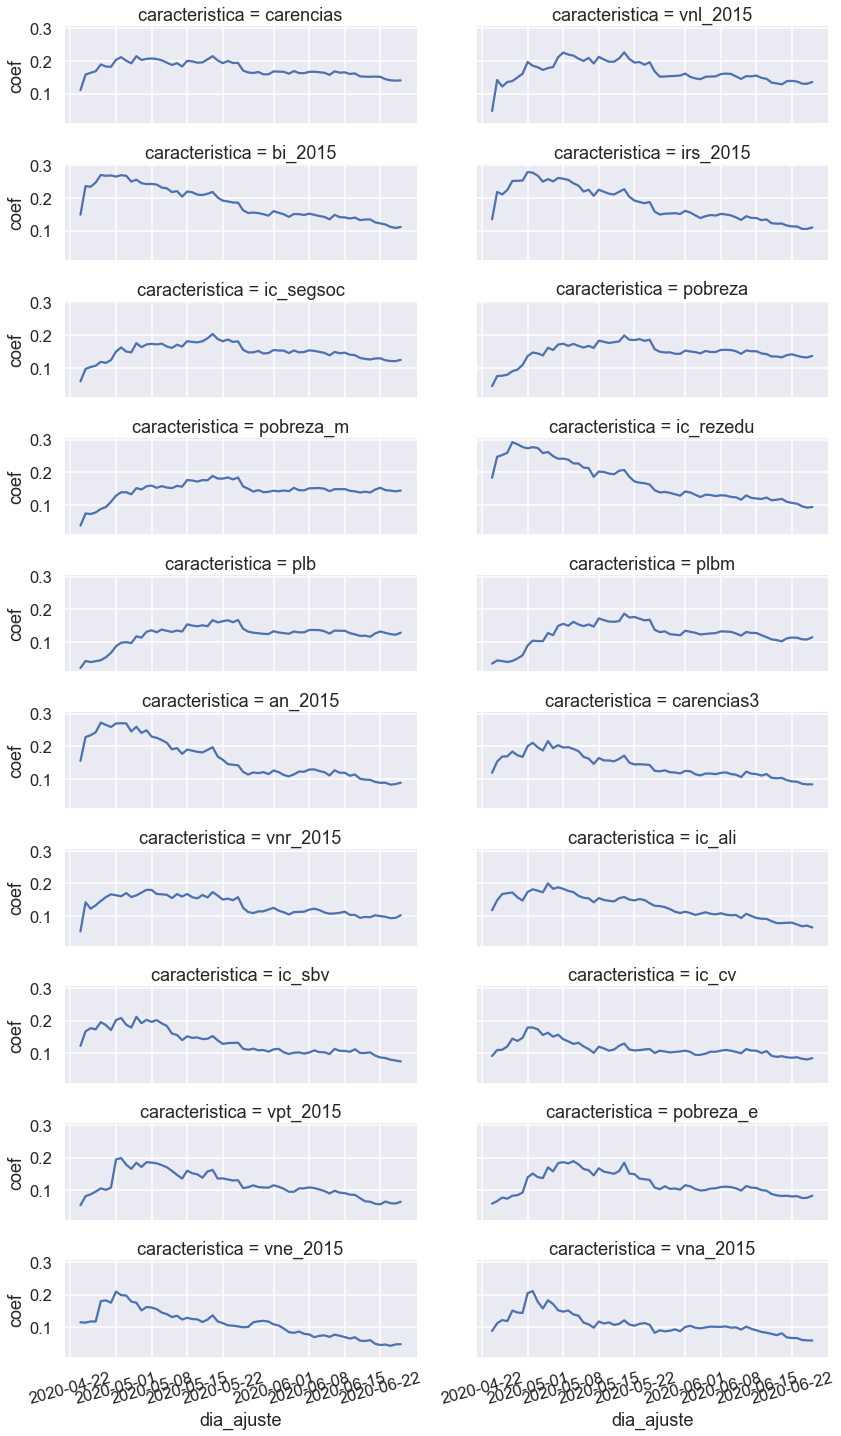

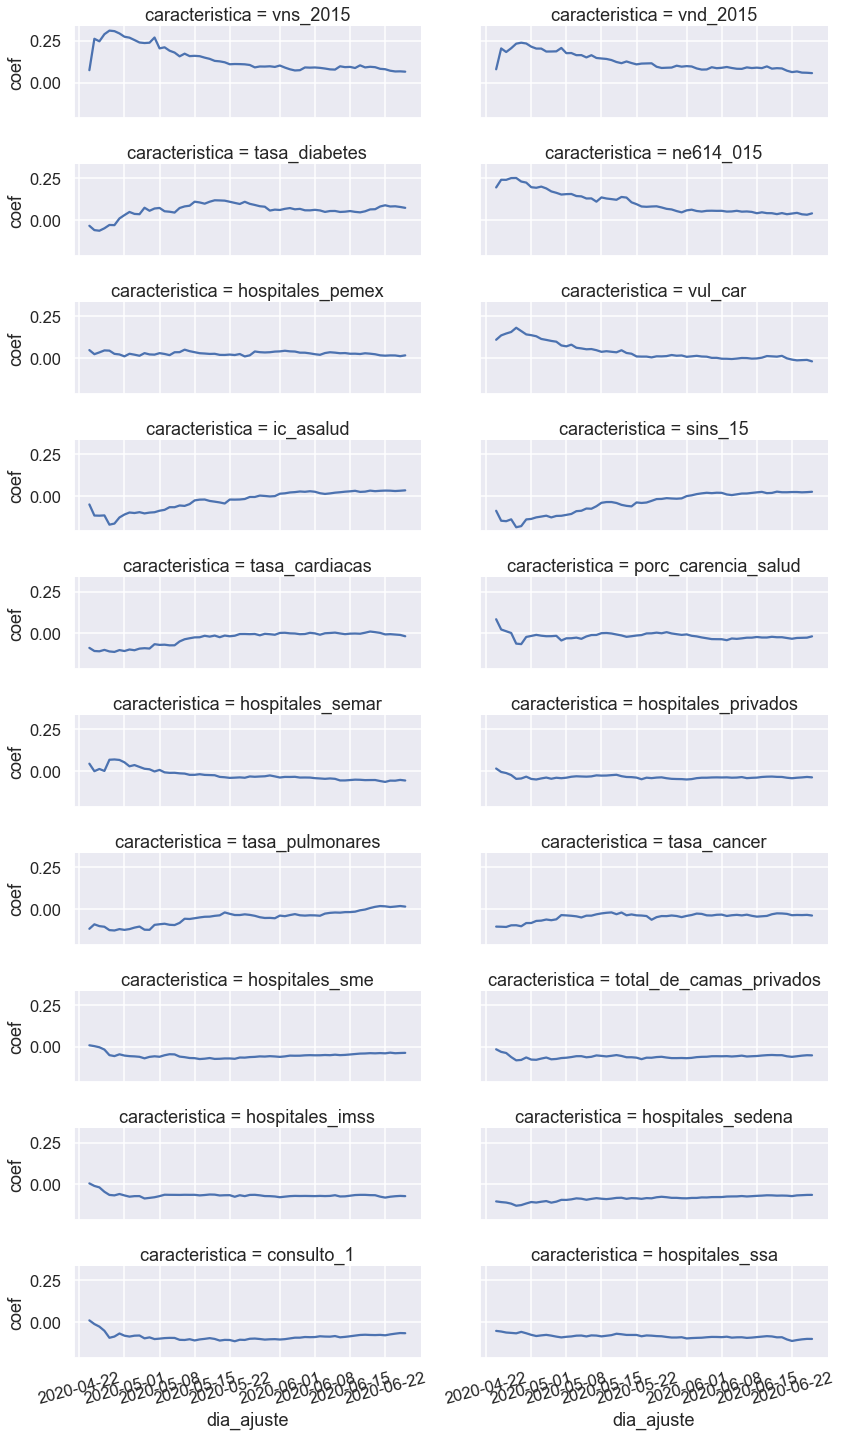

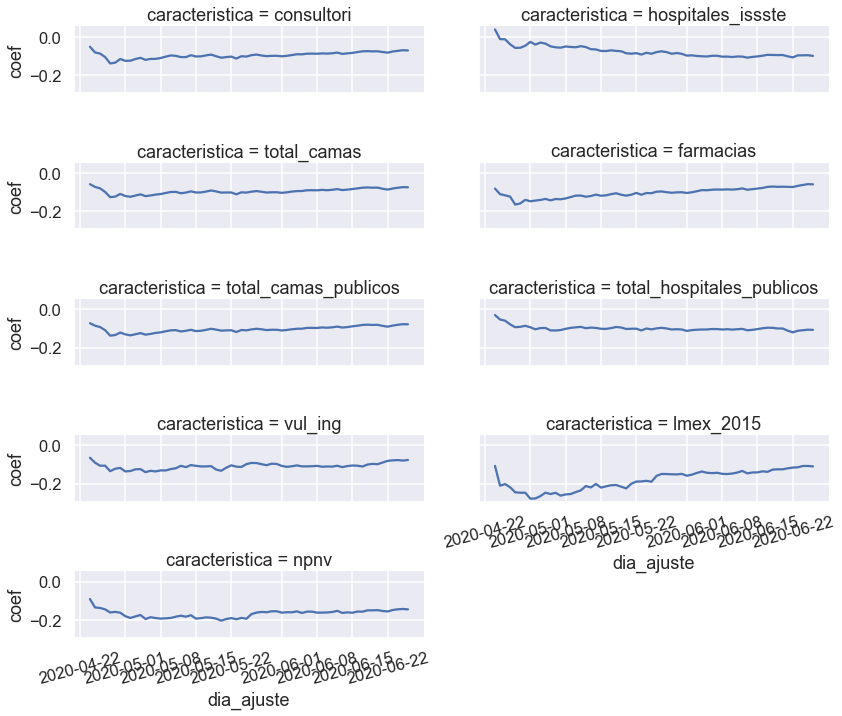

In [ ]:
orden_plots = modelos_pls.sort_values(by='mediana', ascending=False)['caracteristica'].drop_duplicates()

g = sns.FacetGrid(modelos_pls, col="caracteristica", height=2, aspect=3,
                  col_wrap=2, col_order=orden_plots[:20])
g.map(sns.lineplot, 'dia_ajuste', "coef")
g.set_xticklabels(rotation=15)
plt.show()


g = sns.FacetGrid(modelos_pls, col="caracteristica", height=2, aspect=3,
                  col_wrap=2, col_order=orden_plots[20:40])
g.map(sns.lineplot, 'dia_ajuste', "coef")
g.set_xticklabels(rotation=15)
plt.show()

g = sns.FacetGrid(modelos_pls, col="caracteristica", height=2, aspect=3,
                  col_wrap=2, col_order=orden_plots[40:])
g.map(sns.lineplot, 'dia_ajuste', "coef")
g.set_xticklabels(rotation=15)
plt.show()

# sns.pointplot(data=plss[plss.caracteristica == 'ic_rezedu'], x='dia_ajuste', y='coef')

In [ ]:
df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 1))].copy()
df.drop(columns='geometry', inplace=True)
df.to_csv('vulnerabilidad_200601.csv')

### Comparación municipios urbanos y no urbanos

In [ ]:
modelos_urbanos, serie_urbanos = calcular_vulnerabilidad_urbana('200424', '200708', min_casos=20)

IntProgress(value=0, max=75)

In [ ]:
serie_urbanos.drop(columns='geometry').tail()

CLAVE_MUNICIPIO_RES CLAVE_ENTIDAD_RES          MUNICIPIO_RES  \
170080  32053               32                VILLA GONZÁLEZ ORTEGA   
170081  32054               32                VILLA HIDALGO           
170082  32055               32                VILLANUEVA              
170083  32057               32                TRANCOSO                
170084  32058               32                SANTA MARÍA DE LA PAZ   

                  RESULTADO ENTIDAD_RES  conteo  defunciones  pt_2015  \
170080  Positivo SARS-CoV-2  ZACATECAS   2.0     0.0          13099     
170081  Positivo SARS-CoV-2  ZACATECAS   2.0     2.0          19155     
170082  Positivo SARS-CoV-2  ZACATECAS   6.0     1.0          30240     
170083  Positivo SARS-CoV-2  ZACATECAS   6.0     0.0          19413     
170084  Positivo SARS-CoV-2  ZACATECAS   0.0     0.0          2656      

        an_2015  ne614_015  ...  total_de_camas_privados  total_camas  \
170080  5.8034   2.8583     ...  0                        0             
170081  8.1332   3.6565     ...  0                        0             
170082  4.7985   3.4198     ...  0                        22            
170083  5.6122   2.5997     ...  0                        12            
170084  5.3388   1.2563     ...  0                        0             

        pob2020  CVE_MUN  covid_confirmados_100k  covid_defun_100k  \
170080  13945    053      14.342058               0.000000           
170081  20177    054      9.912276                9.912276           
170082  31804    055      18.865552               3.144259           
170083  20285    057      29.578506               0.000000           
170084  2855     058      0.000000                0.000000           

        tasa_covid_letal         modelo  dia_ajuste      valor  
170080  0.000000          PLS_NO_URBANO 2020-07-01   12.726437  
170081  100.000000        PLS_NO_URBANO 2020-07-01   12.995587  
170082  16.666667         PLS_NO_URBANO 2020-07-01   12.442949  
170083  0.000000          PLS_NO_URBANO 2020-07-01   12.284957  
170084 NaN                PLS_NO_URBANO 2020-07-01   13.051086  

[5 rows x 92 columns]

In [ ]:
df = serie_urbanos[((serie_urbanos.modelo == 'PLS_URBANO') | (serie_urbanos.modelo == 'PLS_NO_URBANO')) &
                   (serie_urbanos.dia_ajuste == datetime.datetime(2020, 6, 26))]

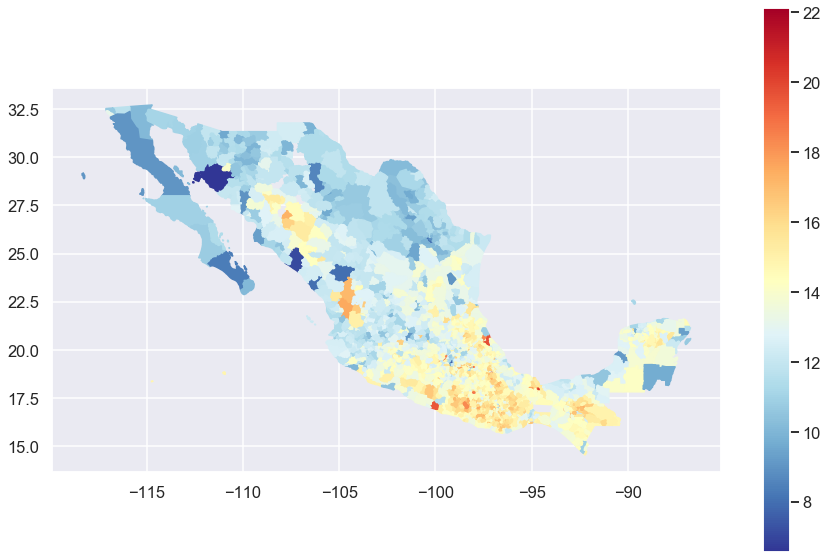

In [ ]:
df[df.valor.notna()].plot(column='valor', figsize=(15, 10), edgecolor='face', cmap='RdYlBu_r', legend=True)
plt.show()

In [ ]:
df = serie_urbanos[((serie_urbanos.modelo == 'PLS_URBANO')) &
                   (serie_urbanos.dia_ajuste == datetime.datetime(2020, 6, 26))]

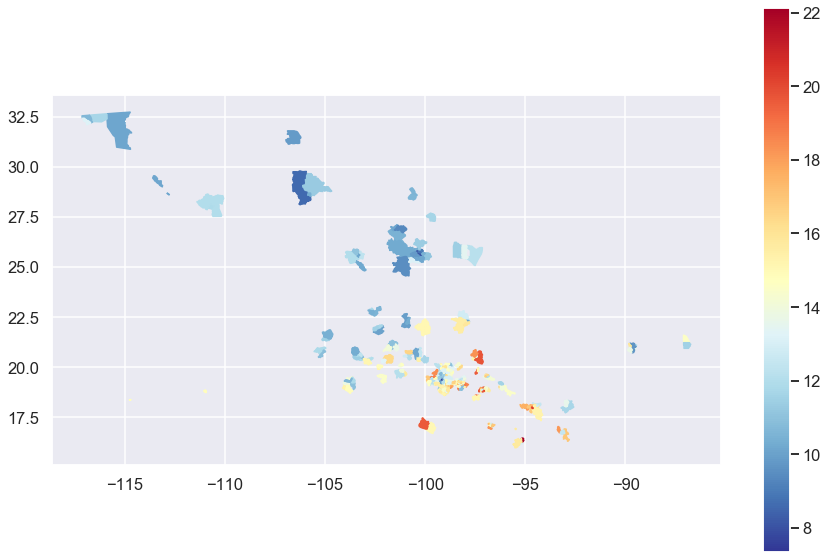

In [ ]:
df[df.valor.notna()].plot(column='valor', figsize=(15, 10), edgecolor='face', cmap='RdYlBu_r', legend=True)
plt.show()

In [ ]:
df = serie_urbanos[((serie_urbanos.modelo == 'PLS_NO_URBANO')) &
                   (serie_urbanos.dia_ajuste == datetime.datetime(2020, 6, 26))]

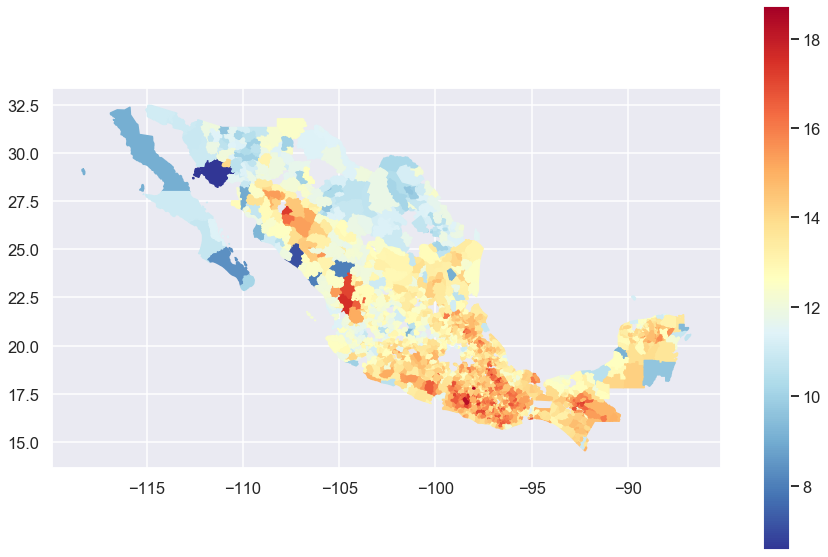

In [ ]:
df[df.valor.notna()].plot(column='valor', figsize=(15, 10), edgecolor='face', cmap='RdYlBu_r', legend=True)
plt.show()

In [ ]:
modelos_urbanos['mediana'] = modelos_urbanos.groupby(['caracteristica', 'modelo'])['coef'].transform('median')


In [ ]:
modelos_urbanos.head()

caracteristica      coef dia_ajuste      modelo  mediana
0  tasa_pulmonares -6.36e-02 2020-04-24  PLS_URBANO -0.02   
1  plbm             9.77e-03 2020-04-24  PLS_URBANO  0.10   
2  vnd_2015        -4.74e-02 2020-04-24  PLS_URBANO  0.03   
3  pobreza_e        2.11e-02 2020-04-24  PLS_URBANO  0.09   
4  an_2015          5.98e-02 2020-04-24  PLS_URBANO  0.10

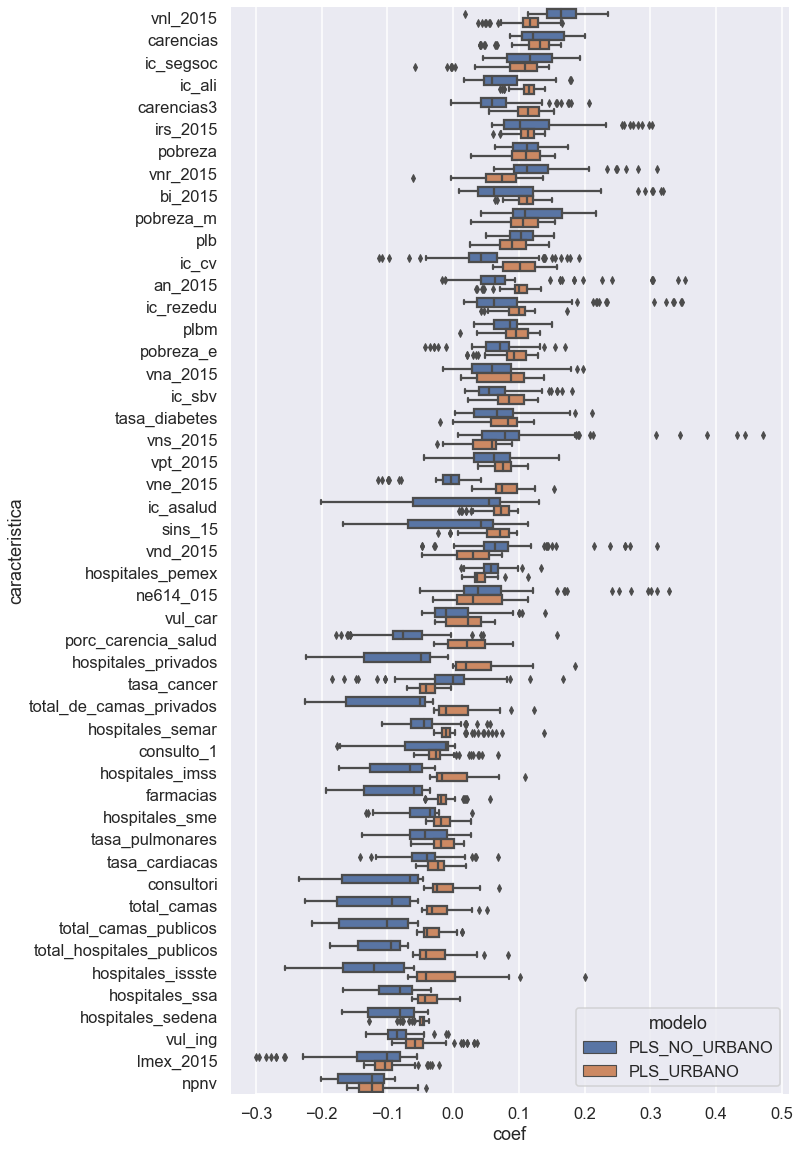

In [ ]:
# Plot the orbital period with horizontal boxes
f, ax = plt.subplots(figsize=(10, 20))
sns.boxplot(y="caracteristica",
            x="coef",
            data=modelos_urbanos.sort_values(by='mediana', ascending=False),
            hue='modelo')
sns.despine(trim=True, left=True)

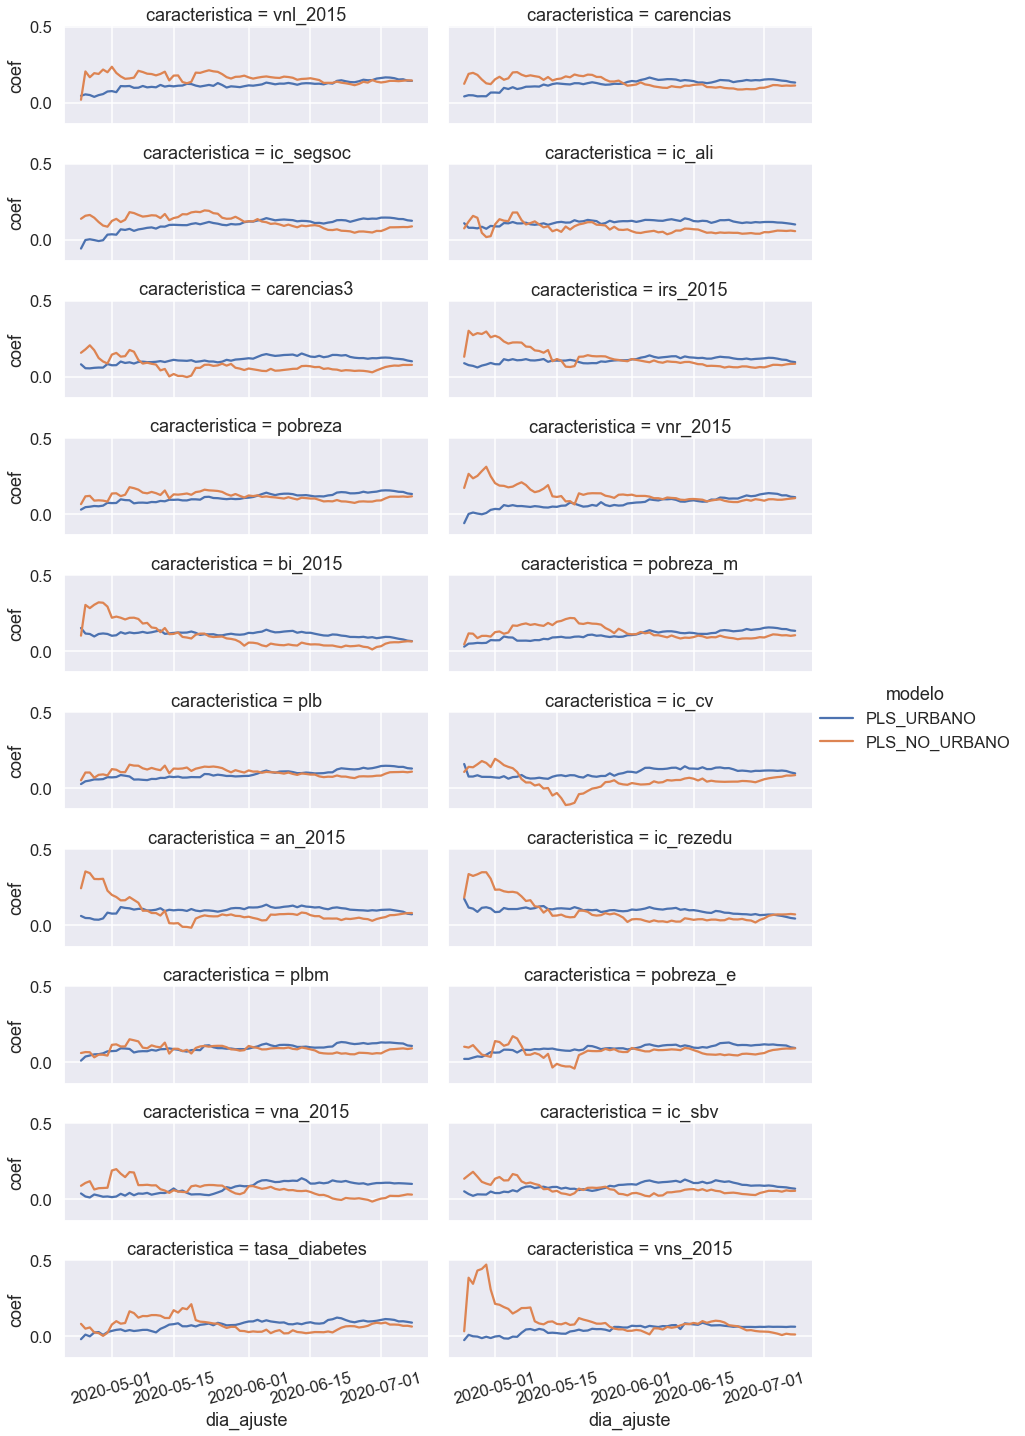

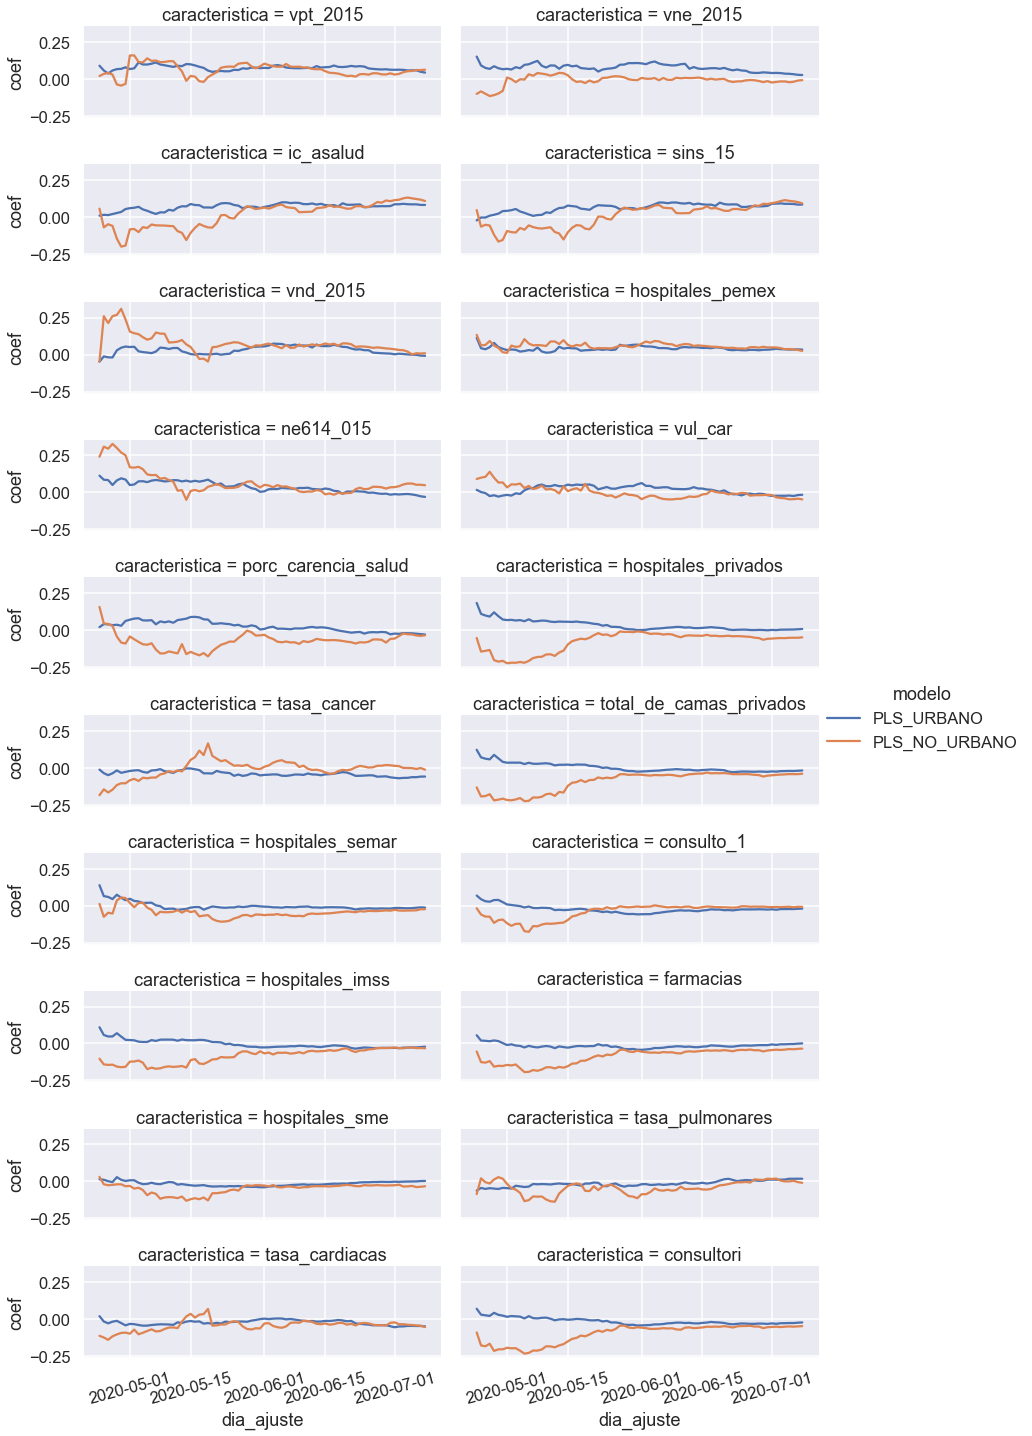

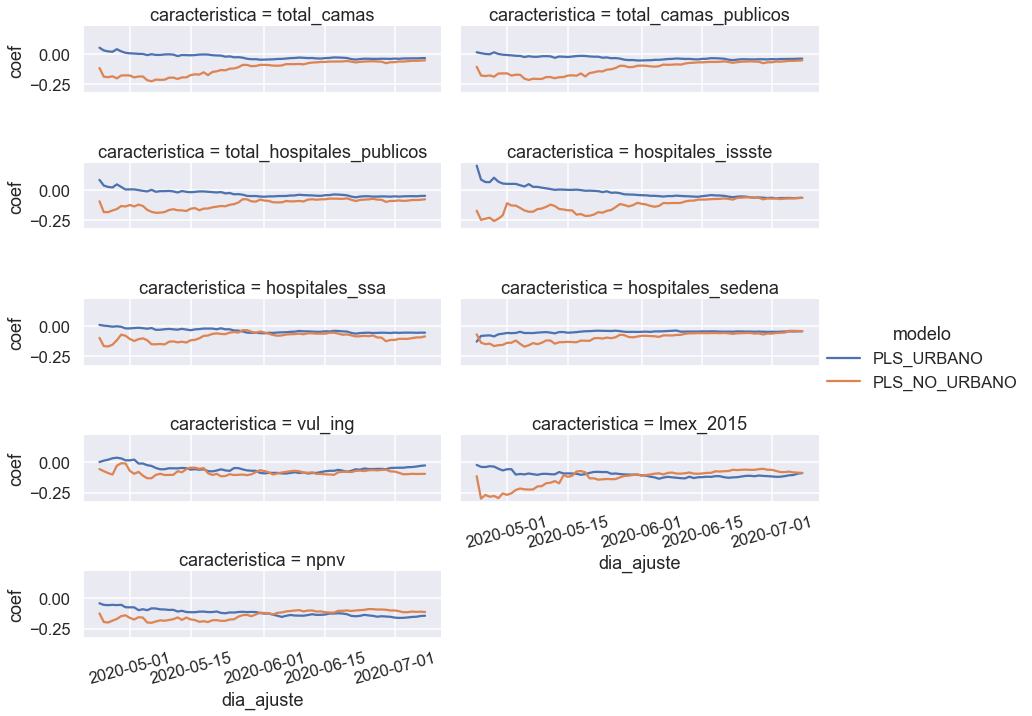

In [ ]:
# ordered_days = tips.day.value_counts().index
orden_plots = modelos_urbanos.sort_values(by='mediana', ascending=False)['caracteristica'].drop_duplicates()

g = sns.FacetGrid(modelos_urbanos, col="caracteristica", height=2, aspect=3,
                  col_wrap=2, col_order=orden_plots[:20], hue='modelo', legend_out=True)
g = g.map(sns.lineplot, 'dia_ajuste', "coef").add_legend()
g.set_xticklabels(rotation=15)
plt.show()


g = sns.FacetGrid(modelos_urbanos, col="caracteristica", height=2, aspect=3,
                  col_wrap=2, col_order=orden_plots[20:40], hue='modelo')
g = g.map(sns.lineplot, 'dia_ajuste', "coef").add_legend()
g.set_xticklabels(rotation=15)
plt.show()

g = sns.FacetGrid(modelos_urbanos, col="caracteristica", height=2, aspect=3,
                  col_wrap=2, col_order=orden_plots[40:], hue='modelo')
g = g.map(sns.lineplot, 'dia_ajuste', "coef").add_legend()
g.set_xticklabels(rotation=15)
plt.show()

# sns.pointplot(data=plss[plss.caracteristica == 'ic_rezedu'], x='dia_ajuste', y='coef')

## Comparación Regresión PLS VS Random Forest

### Serie de tiempo de importancia de indicadores

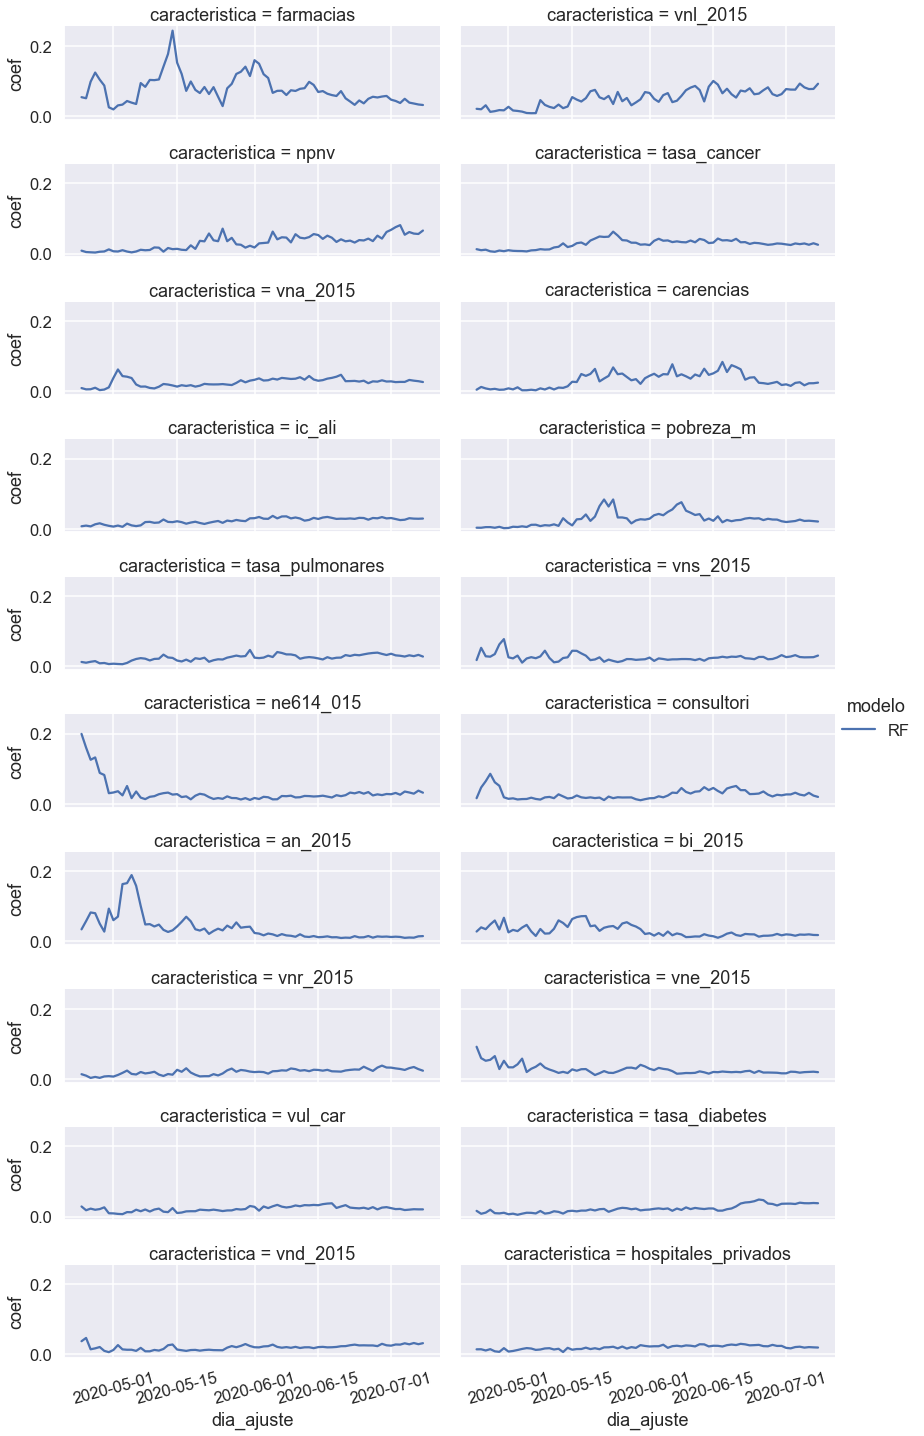

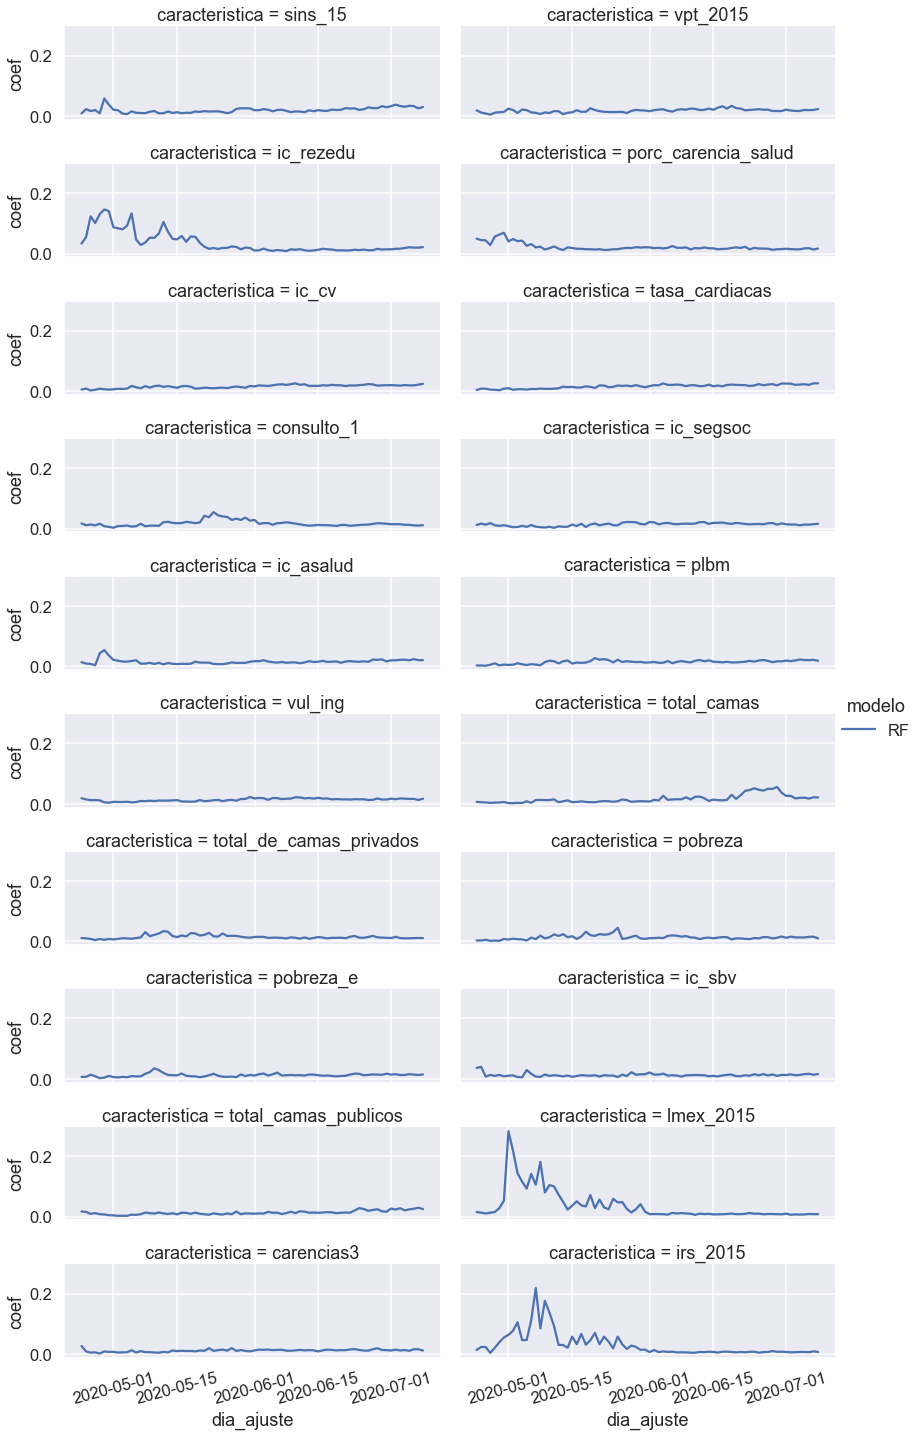

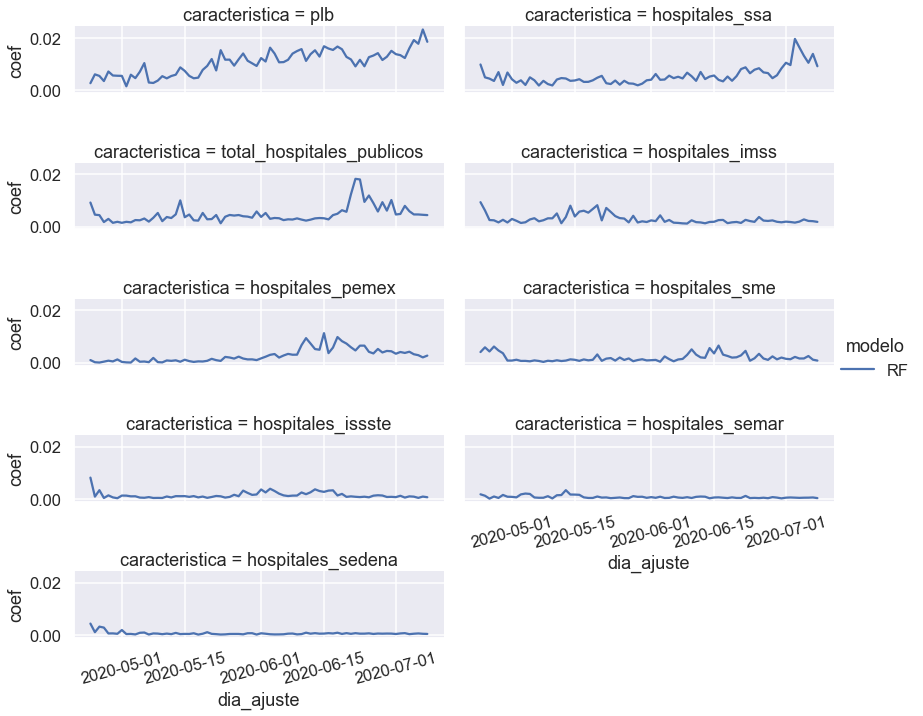

In [ ]:
# ordered_days = tips.day.value_counts().index
modelos_rf = modelos[(modelos.modelo == 'RF') & (modelos.dia_ajuste > datetime.datetime(2020, 5, 26)]
orden_plots = modelos_rf.sort_values(by='mediana', ascending=False)['caracteristica'].drop_duplicates()

g = sns.FacetGrid(modelos_rf, col="caracteristica", height=2, aspect=3,
                  col_wrap=2, col_order=orden_plots[:20], hue='modelo', legend_out=True)
g = g.map(sns.lineplot, 'dia_ajuste', "coef").add_legend()
g.set_xticklabels(rotation=15)
plt.show()


g = sns.FacetGrid(modelos_rf, col="caracteristica", height=2, aspect=3,
                  col_wrap=2, col_order=orden_plots[20:40], hue='modelo')
g = g.map(sns.lineplot, 'dia_ajuste', "coef").add_legend()
g.set_xticklabels(rotation=15)
plt.show()

g = sns.FacetGrid(modelos_rf, col="caracteristica", height=2, aspect=3,
                  col_wrap=2, col_order=orden_plots[40:], hue='modelo')
g = g.map(sns.lineplot, 'dia_ajuste', "coef").add_legend()
g.set_xticklabels(rotation=15)
plt.show()


### Distibución de vulnerabilidad según Random Forest

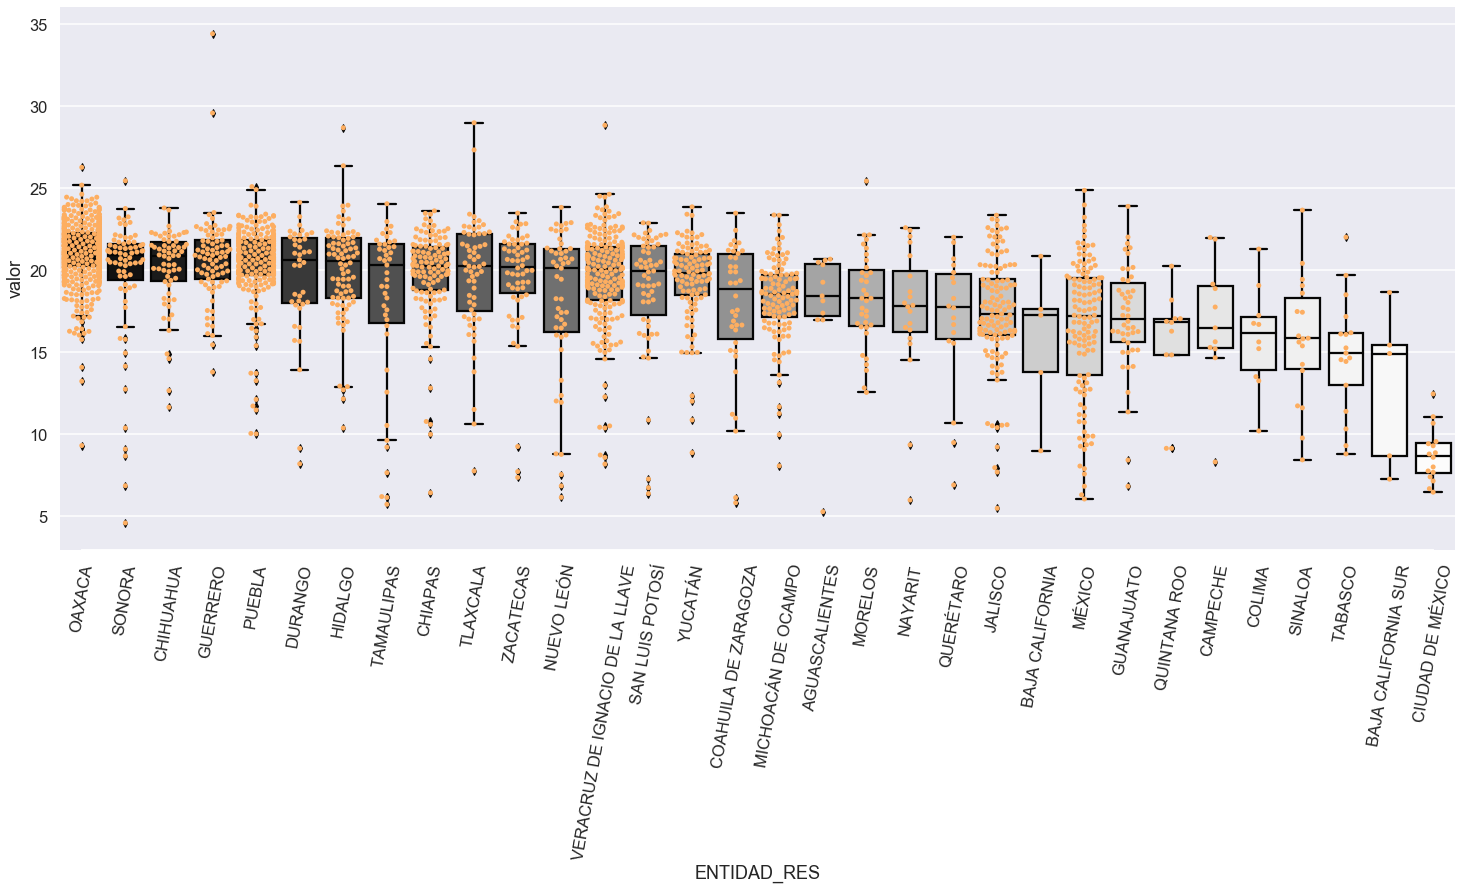

In [ ]:
f, ax = plt.subplots(figsize=(25, 10))
df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 1)) &
                          (serie_vulnerabilidad.modelo == 'RF')].copy()
df['mean_val'] = df.groupby('ENTIDAD_RES')['valor'].transform('median')
sns.boxplot(data=df.sort_values(by='mean_val', ascending=False), y='valor', x='ENTIDAD_RES', palette='Greys_r')
sns.swarmplot(data=df.sort_values(by='mean_val', ascending=False), y='valor', x='ENTIDAD_RES', color='#fdae61')
plt.xticks(rotation=80)
sns.despine(trim=True, left=True)

### Correlación entre letalidad y vulnerabilidad RF

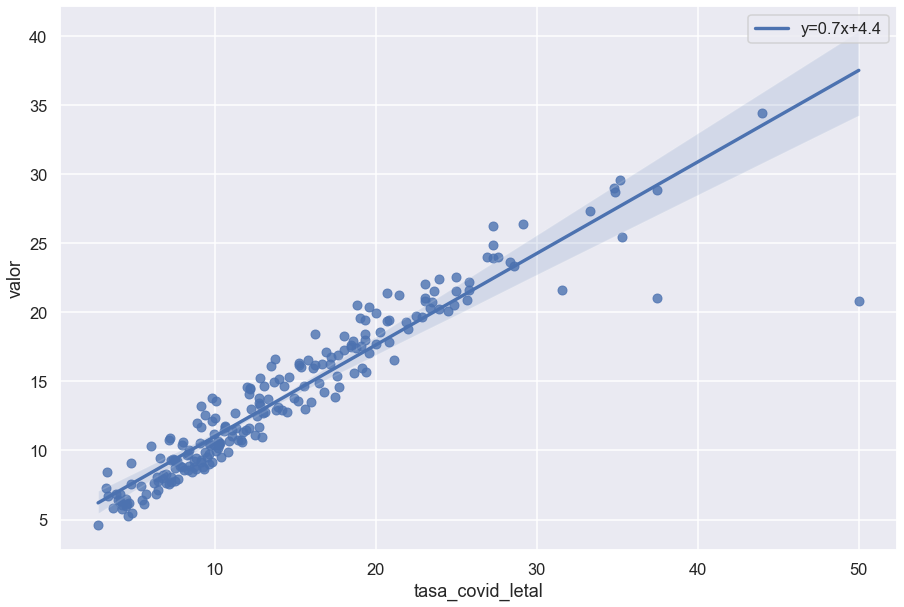

In [ ]:
reg_df = df[(df.defunciones > 5)]
slope, intercept, r_value, p_value, std_err = linregress(reg_df['tasa_covid_letal'], reg_df['valor'])

f, ax = plt.subplots(figsize=(15, 10))
sns.regplot(data=reg_df, x='tasa_covid_letal', y='valor',
           line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

In [ ]:
reg_df = df[(df.defunciones > 5) & df.valor.notna()]
corr, _ = spearmanr(reg_df.tasa_covid_letal, reg_df.valor)
print('Correlación de Spearman: %.3f' % corr)

Correlación de Spearman: 0.967


In [ ]:
modelos[(modelos.modelo == 'RF') & 
        (modelos.dia_ajuste == datetime.datetime(2020, 6, 1))].sort_values(by='coef',
                                                                            ascending=False).reset_index(drop=True)

caracteristica      coef dia_ajuste modelo   mediana
0   vnl_2015                   7.36e-02 2020-06-26  RF     5.37e-02
1   farmacias                  4.92e-02 2020-06-26  RF     7.11e-02
2   tasa_diabetes              4.69e-02 2020-06-26  RF     2.11e-02
3   total_camas                4.37e-02 2020-06-26  RF     1.25e-02
4   npnv                       4.28e-02 2020-06-26  RF     3.50e-02
5   tasa_pulmonares            3.65e-02 2020-06-26  RF     2.48e-02
6   consultori                 3.54e-02 2020-06-26  RF     2.38e-02
7   ne614_015                  3.37e-02 2020-06-26  RF     2.38e-02
8   vnr_2015                   2.89e-02 2020-06-26  RF     2.21e-02
9   sins_15                    2.88e-02 2020-06-26  RF     1.92e-02
10  tasa_cancer                2.76e-02 2020-06-26  RF     2.91e-02
11  vns_2015                   2.69e-02 2020-06-26  RF     2.38e-02
12  ic_ali                     2.59e-02 2020-06-26  RF     2.52e-02
13  vnd_2015                   2.49e-02 2020-06-26  RF     2.00e-02
14  pobreza_m                  2.47e-02 2020-06-26  RF     2.50e-02
15  ic_cv                      2.34e-02 2020-06-26  RF     1.73e-02
16  hospitales_privados        2.29e-02 2020-06-26  RF     1.95e-02
17  carencias                  2.29e-02 2020-06-26  RF     2.74e-02
18  vna_2015                   2.28e-02 2020-06-26  RF     2.75e-02
19  vul_car                    2.19e-02 2020-06-26  RF     2.15e-02
20  vpt_2015                   2.11e-02 2020-06-26  RF     1.89e-02
21  plbm                       2.09e-02 2020-06-26  RF     1.45e-02
22  tasa_cardiacas             1.95e-02 2020-06-26  RF     1.72e-02
23  total_camas_publicos       1.88e-02 2020-06-26  RF     1.21e-02
24  vne_2015                   1.84e-02 2020-06-26  RF     2.18e-02
25  porc_carencia_salud        1.66e-02 2020-06-26  RF     1.81e-02
26  bi_2015                    1.63e-02 2020-06-26  RF     2.33e-02
27  ic_sbv                     1.62e-02 2020-06-26  RF     1.23e-02
28  an_2015                    1.55e-02 2020-06-26  RF     2.34e-02
29  ic_asalud                  1.47e-02 2020-06-26  RF     1.46e-02
30  total_de_camas_privados    1.47e-02 2020-06-26  RF     1.25e-02
31  ic_segsoc                  1.46e-02 2020-06-26  RF     1.47e-02
32  pobreza                    1.43e-02 2020-06-26  RF     1.23e-02
33  pobreza_e                  1.35e-02 2020-06-26  RF     1.23e-02
34  consulto_1                 1.35e-02 2020-06-26  RF     1.50e-02
35  plb                        1.34e-02 2020-06-26  RF     1.15e-02
36  vul_ing                    1.27e-02 2020-06-26  RF     1.42e-02
37  carencias3                 1.14e-02 2020-06-26  RF     1.18e-02
38  ic_rezedu                  1.11e-02 2020-06-26  RF     1.86e-02
39  total_hospitales_publicos  8.99e-03 2020-06-26  RF     3.80e-03
40  lmex_2015                  7.38e-03 2020-06-26  RF     1.18e-02
41  hospitales_ssa             6.93e-03 2020-06-26  RF     4.59e-03
42  irs_2015                   6.63e-03 2020-06-26  RF     1.17e-02
43  hospitales_pemex           3.54e-03 2020-06-26  RF     2.01e-03
44  hospitales_imss            2.30e-03 2020-06-26  RF     2.26e-03
45  hospitales_sme             1.60e-03 2020-06-26  RF     1.35e-03
46  hospitales_issste          1.20e-03 2020-06-26  RF     9.98e-04
47  hospitales_semar           4.16e-04 2020-06-26  RF     5.03e-04
48  hospitales_sedena          3.73e-04 2020-06-26  RF     4.78e-04

### Correlación entre vulnerabilidad RF y letalidad en el futuro

In [ ]:
df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 1)) &
                          (serie_vulnerabilidad.modelo == 'RF')]
X_df = df
df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 26)) &
                          (serie_vulnerabilidad.modelo == 'RF')]
Y_df = df[df.defunciones > 5]

In [ ]:
datos_prueba = Y_df[['CLAVE_MUNICIPIO_RES',
                     'tasa_covid_letal']].merge(X_df[['CLAVE_MUNICIPIO_RES',
                                                      'valor']],
                                                on='CLAVE_MUNICIPIO_RES')

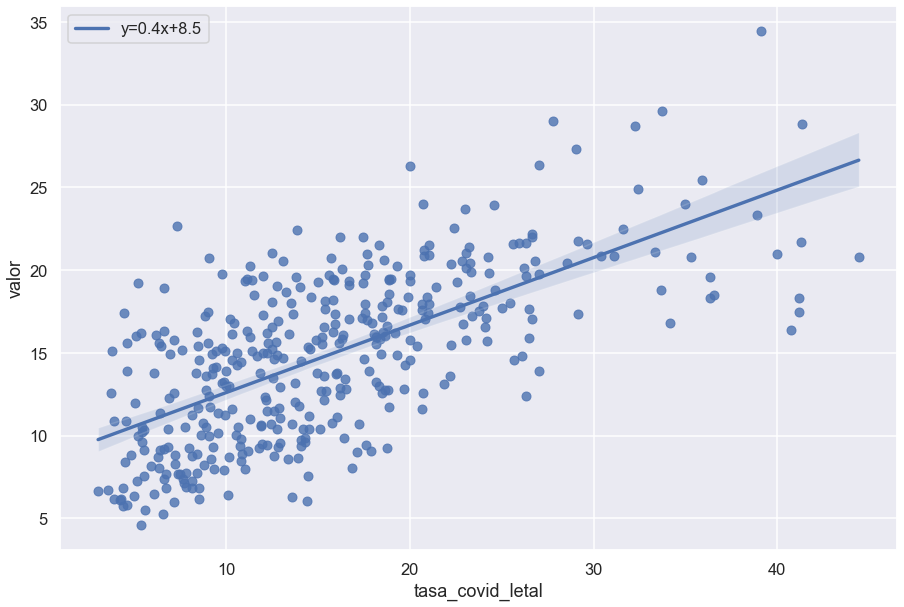

In [ ]:
reg_df = datos_prueba
slope, intercept, r_value, p_value, std_err = linregress(reg_df['tasa_covid_letal'], reg_df['valor'])

f, ax = plt.subplots(figsize=(15, 10))
sns.regplot(data=reg_df, x='tasa_covid_letal', y='valor',
           line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

In [ ]:
corr, _ = spearmanr(reg_df.tasa_covid_letal, reg_df.valor)
print('Correlación de Spearman: %.3f' % corr)

Correlación de Spearman: 0.573


¿Qué tan bien califica los municipios que no estuvieron en el ajuste del RF comparando con el futuro? Es decir los que no tenían más de 20 casos en el ajuste.

### Evaluación con municipios fuera del ajuste en el futuro 

In [ ]:
ajuste_df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 1))]

ajuste_df = ajuste_df[['CLAVE_MUNICIPIO_RES', 'MUNICIPIO_RES', 'modelo', 'valor']]
prueba_df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 26))
                    & (serie_vulnerabilidad.defunciones > 5)]

prueba_df = prueba_df[~prueba_df.CLAVE_MUNICIPIO_RES.isin(ajuste_df.CLAVE_MUNICIPIO_RES.drop_duplicates())]

X_df = serie_vulnerabilidad[(serie_vulnerabilidad.dia_ajuste == datetime.datetime(2020, 6, 1))]
Y_df = prueba_df
datos_prueba = Y_df[['CLAVE_MUNICIPIO_RES',
                     'defunciones', 'conteo', 'tasa_covid_letal']].merge(X_df[['CLAVE_MUNICIPIO_RES',
                                                      'valor', 'modelo']],
                                                on='CLAVE_MUNICIPIO_RES', how='left')

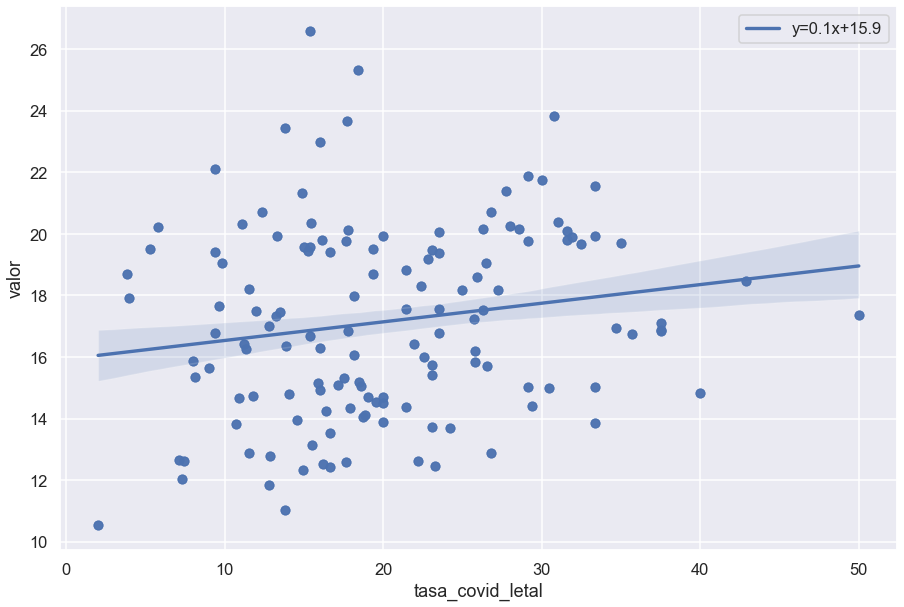

In [ ]:
reg_df = datos_prueba[datos_prueba.modelo == 'PLS']
slope, intercept, r_value, p_value, std_err = linregress(reg_df['tasa_covid_letal'], reg_df['valor'])

f, ax = plt.subplots(figsize=(15, 10))
sns.regplot(data=reg_df, x='tasa_covid_letal', y='valor',
           line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

In [ ]:
corr, _ = spearmanr(reg_df.tasa_covid_letal, reg_df.valor)
print('Correlación de Spearman: %.3f' % corr)

Correlación de Spearman: 0.181


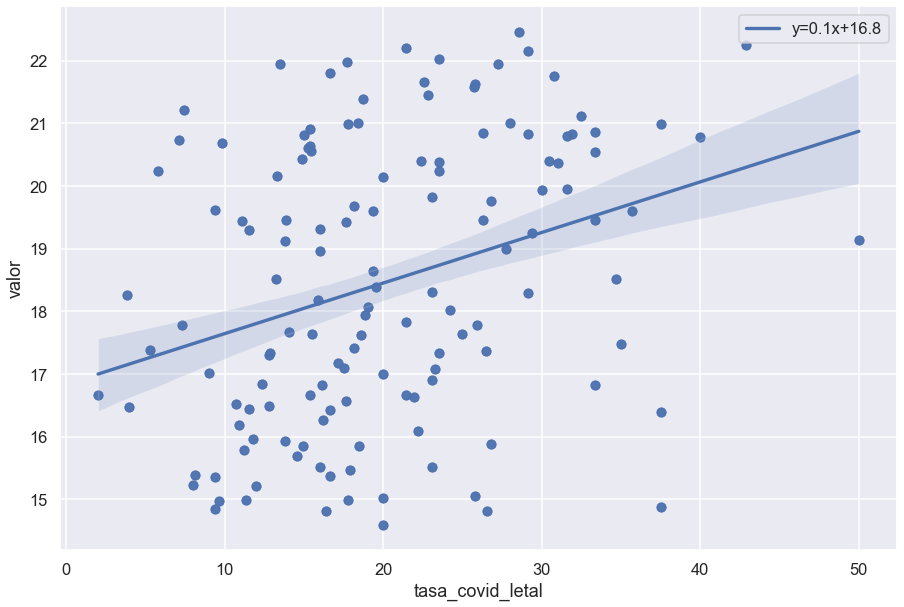

In [ ]:
reg_df = datos_prueba[datos_prueba.modelo == 'RF']
slope, intercept, r_value, p_value, std_err = linregress(reg_df['tasa_covid_letal'], reg_df['valor'])

f, ax = plt.subplots(figsize=(15, 10))
sns.regplot(data=reg_df, x='tasa_covid_letal', y='valor',
           line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()
plt.show()

In [ ]:
corr, _ = spearmanr(reg_df.tasa_covid_letal, reg_df.valor)
print('Correlación de Spearman: %.3f' % corr)

Correlación de Spearman: 0.327


# Conclusiones

Presentamos una herrramienta para identificar municipios vulnerables a los efectos de la pandemia de COVID-19 mediante un índice que sintetiza la relación entre letalidad de COVID-19 y los indicadores de pobreza y rezago social de CONEVAL, el número unidades de salud (privadas y públicas), y estadísticas de mortalidad de INEGI. Este índice sirve como herramienta de inferencia sobre la letalidad observada en los municipios de México. 

Al utilizar como proxy la letalidad consideramos que el índice cuantifica al menos parcialmente la vulnerabilidad de un municipio a la epidemia, en el sentido de que la población de un municipio con alta vulnerabilidad es suceptible a tener una incidencia mayor de casos letales. A diferencia de otros índices de vulnerabilidad que sólo se pueden actualizar conforme se actualizan los datos de indicadores, este índice se puede actualizar siempre que existan datos nuevos sobre los indicadores independientes o se actualicen los datos sobre casos de COVID-19. En este último sentido sirve para monitorear si la relación entre la letalidad y las características cambia. Esto cambio pueden ser debido a intervenciones del gobierno, a nuevos patrones de comportamiento de la sociedad o a cambios en la evolución de la epidemia, y en este sentido el índice no nos explica la causa, sirve para informarnos sobre estos cambios. Consideramos que este seguimiento tiene aplicaciones como detectar si una intervención tuvo resultados para mejorar la respuesta a los casos en municipios con ciertas características. Esto nos permite adaptar el índice a nuevas condiciones de la epidemia, en particular, si la evidencia apunta hacia nuevos municipios como los más vulnerables. También sirve para detectar si cambia la relación entre las características de los municipios y la letalidad, por ejemplo, si con nuevos datos cambian las características que resultan con el mayor coeficiente. Un caso particular que revisamos fue el del índice de rezago educativo, en los primeros días del periódo que analizamos el rezago educativo tiene preponderancia, pero en días posteriores los indicadores relacionados con pobreza, vivienda y cobertura de salud cobran mayor relevancia. Quedan investigar por qué sucede esto. A partir de estas observaciones también surgen preguntas sobre cómo segmentar los datos, por ejemplo, para los municipios urbanos con alta letalidad por COVID-19 es probable que la relación entre sus características y la letalidad sea diferente a la relación que existe en los casos de municipios no urbano con alta letalidad. 

La calidad de este índice depende por supuesto de la calidad de los datos de entrada, y del espectro de indicadores que utilicemos. Datos de comorbilidades, podrían mejorar la infrmación que nos da el índice, así como otros datos económicos y sociales y de disponibilidad de camas por ejemplo.

Esperamos que este trabajo pueda aprovecharse para fortalecer la respuesta para identificar y proteger a poblaciones vulnerables ante la amenaza de ésta pandemia.


Lista de pendientes:

* Calcular varianza de vulnerabilidad municipal de entidades
* Usar datos de mortalidad de R_t
* Calcular varianze de coeficientes con selección aleatoria de municipios
* Probar vulnerabilidad dividiendo por tamaño de población (100k?)
    
    

In [ ]:
# hide

from nbdev.export import notebook2script
notebook2script()